In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# datasets
dirty_train1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_acm_train.tsv", sep="\t")
dirty_train2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_scholar_train.tsv", sep="\t")
dirty_train3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_amazon_train.tsv", sep="\t")
dirty_train4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_walmart_train.tsv", sep="\t")
clean_train1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_acm_train.tsv", sep="\t")
clean_train2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_scholar_train.tsv", sep="\t")
clean_train3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_amazon_train.tsv", sep="\t")
clean_train4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_walmart_train.tsv", sep="\t")
dirty_test1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_acm_test.tsv", sep="\t")
dirty_test2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_scholar_test.tsv", sep="\t")
dirty_test3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_amazon_test.tsv", sep="\t")
dirty_test4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/dirty_walmart_test.tsv", sep="\t")
clean_test1 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_acm_test.tsv", sep="\t")
clean_test2 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_scholar_test.tsv", sep="\t")
clean_test3 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_amazon_test.tsv", sep="\t")
clean_test4 = pd.read_csv("C:/Users/lenovo/Desktop/一起走下去吧/uzh · 学习/项目/clean_walmart_test.tsv", sep="\t")

In [3]:
# character based
def charDistance(s1,s2):
    # get the length of the strings
    m = len(s1)
    n = len(s2)
    # if some of them are empty, return the longer length of them
    if (m==0|n==0):
        return max(m,n)
    # create an empty matrix to store the calculation result
    A = np.zeros((m+1,n+1))
    # initialize the first row and column
    for i in range(0,m+1):
        A[i][0]=i
    for j in range(1,n+1):
        A[0][j]=j
    # calculate the distance column by column
    for j in range(1,n+1):
        for i in range(1,m+1):
            if (s1[i-1]==s2[j-1]):
                d=0
            else: d=1
            A[i][j]=min(A[i-1][j]+1,A[i][j-1]+1,A[i-1][j-1]+d)
    # return the final result
    return A[m][n]/max(m,n)

def prediction(dist_list, threshold):
    pre_list = [0]*len(dist_list)
    for i in range(len(dist_list)):
        if dist_list[i]<threshold:
            pre_list[i] = 1
    return pre_list

def getDistanceChar(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = charDistance(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

def toInt(list):
    result = []
    for i in range(len(list)):
        b = int(list[i])
        result.append(b)
    return result

def max_threshold(dist, real):
    max_f = 0
    max_t = 0
    threshold_list = np.linspace(0,1,101)
    for i in range(len(threshold_list)):
        pre_list = prediction(dist, threshold_list[i])
        pre = toInt(pre_list)
        f = f1_score(real, pre, average='binary')
        if f>max_f:
            max_f = f
            max_t = threshold_list[i]
    return max_t, max_f

def toStr(list):
    result = []
    for i in range(len(list)):
        a = str(list[i])
        result.append(a)
    return result

In [4]:
# crossparsing
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s

def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

def getDistanceCross(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = distCPD(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

In [5]:
# token based
def withStar(string):
    if string=='':
        return ''
    else:
        string = string.replace(" ", "**")
        return '**'+string[:]+'**'
    
def grams(string,num)->list[str]:
    string=withStar(string)
    begin=len(string)-num;
    token=[];
    for i in range(begin+1):
        a=[];
        a=string[i:i+3]
        token.append(a);
    return token;

def overlap(string1,string2)->int:
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    m=min(len(s1),len(s2));
    if m==0: 
        return 0;
    else:
        sim1=lc/m;
        return sim1;
    
def jaccard(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    union_elements=list(set(s1).union(set(s2)));
    lu=len(union_elements);
    if lu==0:
        return 0;
    else:
        sim2 = lc/lu;
        return sim2;
    
def dice(string1,string2):
    s1=grams(string1,3);
    s2=grams(string2,3);
    common_elements = list(set(s1).intersection(set(s2)));
    lc=len(common_elements);
    if len(s1)+len(s2)==0:
        return 0;
    else:
        sim3=2*lc/(len(s1)+len(s2));
        return sim3;
    
def accuracy(mark_real,mark_test):
    sum = 0
    for i in range(len(mark_real)):
        if mark_real[i]==mark_test[i]:
            sum=sum+1
        else:
            continue
    return sum/len(mark_test)

def getCoeffOverlap(list_text1, list_text2):
    coeff = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        c = overlap(list_text1[i],list_text2[i])
        coeff.append(c)
    return coeff

def getCoeffJaccard(list_text1, list_text2):
    coeff = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        c = jaccard(list_text1[i],list_text2[i])
        coeff.append(c)
    return coeff

def getCoeffDice(list_text1, list_text2):
    coeff = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        c = dice(list_text1[i],list_text2[i])
        coeff.append(c)
    return coeff

def token_prediction(coeff_list, threshold):
    pre_list = [0]*len(coeff_list)
    for i in range(len(coeff_list)):
        if coeff_list[i]>threshold:
            pre_list[i] = 1
    return pre_list

def token_threshold(coeff, real):
    max_f = 0
    max_t = 0
    threshold_list = np.linspace(0,1,101)
    for i in range(len(threshold_list)):
        pre_list = token_prediction(coeff, threshold_list[i])
        pre = toInt(pre_list)
        f = f1_score(real, pre, average='binary')
        if f>max_f:
            max_f = f
            max_t = threshold_list[i]
    return max_t, max_f

## dblp acm

### character based

dblp acm clean character based method
threshold of the training set is:0.49
f1 score of training set is:0.8790035587188612
f1 score of the testing set is:0.8759124087591241
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2029
           1       0.82      0.95      0.88       444

    accuracy                           0.95      2473
   macro avg       0.90      0.95      0.92      2473
weighted avg       0.96      0.95      0.95      2473

[[1934   95]
 [  24  420]]


<AxesSubplot:>

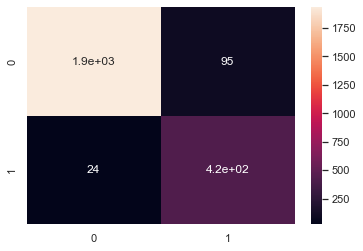

In [6]:
# dblp acm clean character based
dist_train_char_1_1 = getDistanceChar(clean_train1['text_left'], clean_train1['text_right'])
real_train1_1 = toInt(clean_train1['label'])
t_train_char_1_1, f_train_char_1_1 = max_threshold(dist_train_char_1_1, real_train1_1)
print('dblp acm clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_1_1))
print('f1 score of training set is:{}'.format(f_train_char_1_1))
dist_test_char_1_1 = getDistanceChar(clean_test1['text_left'], clean_test1['text_right'])
real_test1_1 = toInt(clean_test1['label'])
pre_list_char_1_1 = prediction(dist_test_char_1_1, t_train_char_1_1)
pre_char_1_1 = toInt(pre_list_char_1_1)
f_test_char_1_1 = f1_score(real_test1_1, pre_char_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_1_1))
print(classification_report(real_test1_1, pre_char_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_char_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [7]:
# dblp acm clean character based false positive (down left)
print("dblp acm clean character based false positive")
for i in range(len(dist_test_char_1_1)):
    if(dist_test_char_1_1[i]<t_train_char_1_1 and real_test1_1[i]==0):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean character based false positive
1
clustering validity checking methods : part ii michalis vazirgiannis , maria halkidi , yannis batistakis sigmod record 2002
cluster validity methods : part i maria halkidi , yannis batistakis , michalis vazirgiannis acm sigmod record 2002
--------------------------------------
19
tods reviewers richard t. snodgrass sigmod record 2003
book reviews acm sigmod record 2003
--------------------------------------
68
book review column karl aberer sigmod record 2002
book review column karl aberer acm sigmod record 2002
--------------------------------------
134
data management issues in electronic commerce ( panel ) m. tamer özsu sigmod conference 1999
data management issues in electronic commerce : guest editor 's introduction asuman dogac acm sigmod record 2002
--------------------------------------
140
reminiscences on influential papers kaladhar voruganti , renée j. miller , kenneth a. ross , flip korn sigmod record 2002
reminiscences on inf

In [8]:
# dblp acm clean character based false negative (top right)
print("dblp acm clean character based false negative")
for i in range(len(dist_test_char_1_1)):
    if(dist_test_char_1_1[i]>=t_train_char_1_1 and real_test1_1[i]==1):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean character based false negative
146
foreword by the vldb '98 pc chairmen : best papers of vldb '98 oded shmueli , jennifer widom vldb j. 2000
foreword by the vldb '98 pc chairmen o. shmueli , j. widom the vldb journal -- the international journal on very large data bases 2000
--------------------------------------
222
datasplash vuk ercegovac , allison woodruff , michael stonebraker , mark lin , mybrid spalding , alexander aiken , chris olston , michael chu sigmod conference 1998
datasplash chris olston , allison woodruff , alexander aiken , michael chu , vuk ercegovac , mark lin , mybrid spalding , michael stonebraker international conference on management of data 1998
--------------------------------------
311
exchanging intensional xml data omar benjelloun , tova milo , serge abiteboul , frederic dang ngoc , bernd amann sigmod conference 2003
exchanging intensional xml data tova milo , serge abiteboul , bernd amann , omar benjelloun , fred dang ngoc international confe

### crossparsing

dblp acm clean character crossparsing
threshold of the training set is:0.23
f1 score of training set is:0.9303519061583578
f1 score of the testing set is:0.9218921892189219
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2029
           1       0.90      0.94      0.92       444

    accuracy                           0.97      2473
   macro avg       0.94      0.96      0.95      2473
weighted avg       0.97      0.97      0.97      2473

[[1983   46]
 [  25  419]]


<AxesSubplot:>

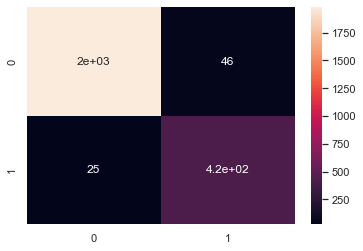

In [9]:
# dblp acm clean crossparsing
dist_train_cross_1_1 = getDistanceCross(clean_train1['text_left'], clean_train1['text_right'])
real_train1_1 = toInt(clean_train1['label'])
t_train_cross_1_1, f_train_cross_1_1 = max_threshold(dist_train_cross_1_1, real_train1_1)
print('dblp acm clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_1_1))
print('f1 score of training set is:{}'.format(f_train_cross_1_1))
dist_test_cross_1_1 = getDistanceCross(clean_test1['text_left'], clean_test1['text_right'])
real_test1_1 = toInt(clean_test1['label'])
pre_list_cross_1_1 = prediction(dist_test_cross_1_1, t_train_cross_1_1)
pre_cross_1_1 = toInt(pre_list_cross_1_1)
f_test_cross_1_1 = f1_score(real_test1_1, pre_cross_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_1_1))
print(classification_report(real_test1_1, pre_cross_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_cross_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

[[1983   46]
 [  25  419]]


<AxesSubplot:>

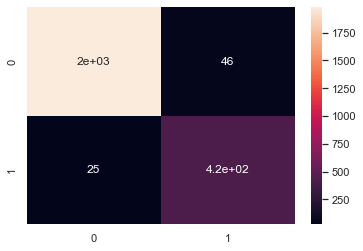

In [10]:
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_cross_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [11]:
# dblp acm clean crossparsing false positive
print("dblp acm clean crossparsing false positive")
for i in range(len(dist_test_cross_1_1)):
    if(dist_test_cross_1_1[i]<t_train_cross_1_1 and real_test1_1[i]==0):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean crossparsing false positive
1
clustering validity checking methods : part ii michalis vazirgiannis , maria halkidi , yannis batistakis sigmod record 2002
cluster validity methods : part i maria halkidi , yannis batistakis , michalis vazirgiannis acm sigmod record 2002
--------------------------------------
68
book review column karl aberer sigmod record 2002
book review column karl aberer acm sigmod record 2002
--------------------------------------
140
reminiscences on influential papers kaladhar voruganti , renée j. miller , kenneth a. ross , flip korn sigmod record 2002
reminiscences on influential papers kenneth a. ross acm sigmod record 2000
--------------------------------------
153
panel : future directions of database research - the vldb broadening strategy , part 2 michael l. brodie vldb 2000
panel : future directions of database research - the vldb broadening strategy , part 1 hans-j &#246; rg schek very large data bases 2000
-----------------------------------

In [12]:
# dblp acm clean crossparsing false negative
print("dblp acm clean crossparsing false negative")
for i in range(len(dist_test_cross_1_1)):
    if(dist_test_cross_1_1[i]>=t_train_cross_1_1 and real_test1_1[i]==1):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean crossparsing false negative
146
foreword by the vldb '98 pc chairmen : best papers of vldb '98 oded shmueli , jennifer widom vldb j. 2000
foreword by the vldb '98 pc chairmen o. shmueli , j. widom the vldb journal -- the international journal on very large data bases 2000
--------------------------------------
464
a multimedia presentation algebra maria luisa sapino , sibel adali , v. s. subrahmanian sigmod conference 1999
a multimedia presentation algebra s. adali , m. l. sapino , v. s. subrahmanian international conference on management of data 1999
--------------------------------------
565
author index ? vldb 2000
author index very large data bases 2000
--------------------------------------
619
sleepers and workaholics : caching strategies in mobile environments tomasz imielinski , daniel barbará vldb j. 1995
sleepers and workaholics : caching strategies in mobile environments ( extended version ) daniel barbar &#225; , tomasz imieli &#324; ski the vldb journal -- t

### token based

dblp acm clean overlap
threshold of the training set is:0.7000000000000001
f1 score of training set is:0.8923512747875354
f1 score of the testing set is:0.8881922675026123
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2029
           1       0.83      0.96      0.89       444

    accuracy                           0.96      2473
   macro avg       0.91      0.96      0.93      2473
weighted avg       0.96      0.96      0.96      2473

[[1941   88]
 [  19  425]]


<AxesSubplot:>

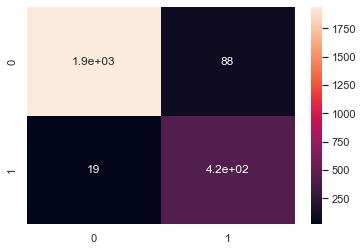

In [13]:
# dblp acm clean overlap
coeff_train_overlap_1_1 = getCoeffOverlap(clean_train1['text_left'], clean_train1['text_right'])
real_train1_1 = toInt(clean_train1['label'])
t_train_overlap_1_1, f_train_overlap_1_1 = token_threshold(coeff_train_overlap_1_1, real_train1_1)
print('dblp acm clean overlap')
print('threshold of the training set is:{}'.format(t_train_overlap_1_1))
print('f1 score of training set is:{}'.format(f_train_overlap_1_1))
coeff_test_overlap_1_1 = getCoeffOverlap(clean_test1['text_left'], clean_test1['text_right'])
real_test1_1 = toInt(clean_test1['label'])
pre_list_overlap_1_1 = token_prediction(coeff_test_overlap_1_1, t_train_overlap_1_1)
pre_overlap_1_1 = toInt(pre_list_overlap_1_1)
f_test_overlap_1_1 = f1_score(real_test1_1, pre_overlap_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_overlap_1_1))
print(classification_report(real_test1_1, pre_overlap_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_overlap_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

[[1941   88]
 [  19  425]]


<AxesSubplot:>

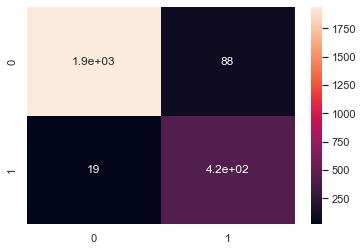

In [14]:
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_overlap_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [15]:
# dblp acm clean overlap false positive
print("dblp acm clean overlap false positive")
for i in range(len(coeff_test_overlap_1_1)):
    if(coeff_test_overlap_1_1[i]>t_train_overlap_1_1 and real_test1_1[i]==0):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean overlap false positive
1
clustering validity checking methods : part ii michalis vazirgiannis , maria halkidi , yannis batistakis sigmod record 2002
cluster validity methods : part i maria halkidi , yannis batistakis , michalis vazirgiannis acm sigmod record 2002
--------------------------------------
65
reminiscences on influential papers daniel j. rosenkrantz , nick koudas , dan suciu , peter scheuermann , rajeev rastogi , jiawei han , kenneth a. ross sigmod record 2001
influential papers ken ross acm sigmod record 2003
--------------------------------------
68
book review column karl aberer sigmod record 2002
book review column karl aberer acm sigmod record 2002
--------------------------------------
140
reminiscences on influential papers kaladhar voruganti , renée j. miller , kenneth a. ross , flip korn sigmod record 2002
reminiscences on influential papers kenneth a. ross acm sigmod record 2000
--------------------------------------
153
panel : future directions of

In [16]:
# dblp acm clean overlap false negative
print("dblp acm clean overlap false negative")
for i in range(len(coeff_test_overlap_1_1)):
    if(coeff_test_overlap_1_1[i]<=t_train_overlap_1_1 and real_test1_1[i]==1):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean overlap false negative
85
an orthogonally persistent java mick j. jordan , susan spence , laurent daynès , malcolm p. atkinson , tony printezis sigmod record 1996
an orthogonally persistent java m. p. atkinson , l. dayn &#232; s , m. j. jordan , t. printezis , s. spence acm sigmod record 1996
--------------------------------------
146
foreword by the vldb '98 pc chairmen : best papers of vldb '98 oded shmueli , jennifer widom vldb j. 2000
foreword by the vldb '98 pc chairmen o. shmueli , j. widom the vldb journal -- the international journal on very large data bases 2000
--------------------------------------
353
contracting in the days of ebusiness wolfgang hümmer , wolfgang lehner , hartmut wedekind sigmod record 2002
contracting in the days of ebusiness w. h &#252; mmer , w. lehner , h. wedekind acm sigmod record 2002
--------------------------------------
614
data and knowledge base research at hong kong university of science and technology babak hamidzadeh , kamalak

dblp acm clean jaccard
threshold of the training set is:0.56
f1 score of training set is:0.935541951746489
f1 score of the testing set is:0.9343379978471475
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2029
           1       0.89      0.98      0.93       444

    accuracy                           0.98      2473
   macro avg       0.94      0.98      0.96      2473
weighted avg       0.98      0.98      0.98      2473

[[1978   51]
 [  10  434]]


<AxesSubplot:>

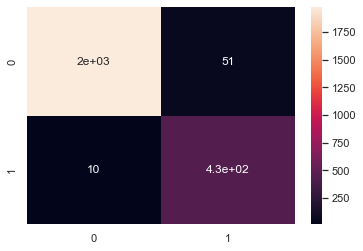

In [17]:
# dblp acm clean jaccard
coeff_train_jaccard_1_1 = getCoeffJaccard(clean_train1['text_left'], clean_train1['text_right'])
real_train1_1 = toInt(clean_train1['label'])
t_train_jaccard_1_1, f_train_jaccard_1_1 = token_threshold(coeff_train_jaccard_1_1, real_train1_1)
print('dblp acm clean jaccard')
print('threshold of the training set is:{}'.format(t_train_jaccard_1_1))
print('f1 score of training set is:{}'.format(f_train_jaccard_1_1))
coeff_test_jaccard_1_1 = getCoeffJaccard(clean_test1['text_left'], clean_test1['text_right'])
real_test1_1 = toInt(clean_test1['label'])
pre_list_jaccard_1_1 = token_prediction(coeff_test_jaccard_1_1, t_train_jaccard_1_1)
pre_jaccard_1_1 = toInt(pre_list_jaccard_1_1)
f_test_jaccard_1_1 = f1_score(real_test1_1, pre_jaccard_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_jaccard_1_1))
print(classification_report(real_test1_1, pre_jaccard_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_jaccard_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [18]:
C2= confusion_matrix(real_test1_1, pre_list_jaccard_1_1, labels=[0, 1])
print(C2)

[[1978   51]
 [  10  434]]


In [19]:
# dblp acm clean jaccard false positive
print("dblp acm clean jaccard false positive")
for i in range(len(coeff_test_jaccard_1_1)):
    if(coeff_test_jaccard_1_1[i]>t_train_jaccard_1_1 and real_test1_1[i]==0):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean jaccard false positive
1
clustering validity checking methods : part ii michalis vazirgiannis , maria halkidi , yannis batistakis sigmod record 2002
cluster validity methods : part i maria halkidi , yannis batistakis , michalis vazirgiannis acm sigmod record 2002
--------------------------------------
68
book review column karl aberer sigmod record 2002
book review column karl aberer acm sigmod record 2002
--------------------------------------
153
panel : future directions of database research - the vldb broadening strategy , part 2 michael l. brodie vldb 2000
panel : future directions of database research - the vldb broadening strategy , part 1 hans-j &#246; rg schek very large data bases 2000
--------------------------------------
186
book review column karl aberer sigmod record 2002
book review column karl aberer acm sigmod record 2003
--------------------------------------
226
spatial indexing of high-dimensional data based on relative approximation shunsuke uemura 

In [20]:
# dblp acm clean jaccard false negative
print("dblp acm clean jaccard false negative")
for i in range(len(coeff_test_jaccard_1_1)):
    if(coeff_test_jaccard_1_1[i]<=t_train_jaccard_1_1 and real_test1_1[i]==1):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean jaccard false negative
146
foreword by the vldb '98 pc chairmen : best papers of vldb '98 oded shmueli , jennifer widom vldb j. 2000
foreword by the vldb '98 pc chairmen o. shmueli , j. widom the vldb journal -- the international journal on very large data bases 2000
--------------------------------------
565
author index ? vldb 2000
author index very large data bases 2000
--------------------------------------
652
the tsql2 final language definition announcement ? sigmod record 1994
announcement-the temporal query language tsql2 final language definition richard thomas snodgrass , ilsoo ahn , gad ariav , don batory , james clifford , curtis e. dyreson , ramez elmasri , fabio grandi , christian s. jensen , wolfgang k &#228; fer , nick kline , krishna kulkarni , t. y. cliff leung , nikos lorentzos , john f. roddick , arie segev , michael d. soo , suryanarayana m. sripada acm sigmod record 1994
--------------------------------------
754
anatomy of a native xml base managem

dblp acm clean dice
threshold of the training set is:0.62
f1 score of training set is:0.9222343921139101
f1 score of the testing set is:0.9088937093275489
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2029
           1       0.88      0.94      0.91       444

    accuracy                           0.97      2473
   macro avg       0.93      0.96      0.94      2473
weighted avg       0.97      0.97      0.97      2473

[[1970   59]
 [  25  419]]


<AxesSubplot:>

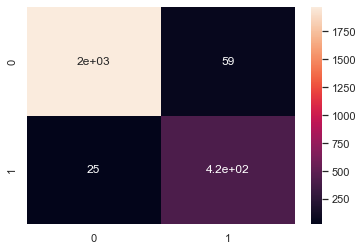

In [21]:
# dblp acm clean dice
coeff_train_dice_1_1 = getCoeffDice(clean_train1['text_left'], clean_train1['text_right'])
real_train1_1 = toInt(clean_train1['label'])
t_train_dice_1_1, f_train_dice_1_1 = token_threshold(coeff_train_dice_1_1, real_train1_1)
print('dblp acm clean dice')
print('threshold of the training set is:{}'.format(t_train_dice_1_1))
print('f1 score of training set is:{}'.format(f_train_dice_1_1))
coeff_test_dice_1_1 = getCoeffDice(clean_test1['text_left'], clean_test1['text_right'])
real_test1_1 = toInt(clean_test1['label'])
pre_list_dice_1_1 = token_prediction(coeff_test_dice_1_1, t_train_dice_1_1)
pre_dice_1_1 = toInt(pre_list_dice_1_1)
f_test_dice_1_1 = f1_score(real_test1_1, pre_dice_1_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_dice_1_1))
print(classification_report(real_test1_1, pre_dice_1_1))
sns.set()
C2= confusion_matrix(real_test1_1, pre_list_dice_1_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [22]:
C2= confusion_matrix(real_test1_1, pre_list_dice_1_1, labels=[0, 1])
print(C2)

[[1970   59]
 [  25  419]]


In [23]:
# dblp acm clean dice false positive
print("dblp acm clean dice false positive")
for i in range(len(coeff_test_dice_1_1)):
    if(coeff_test_dice_1_1[i]>t_train_dice_1_1 and real_test1_1[i]==0):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean dice false positive
1
clustering validity checking methods : part ii michalis vazirgiannis , maria halkidi , yannis batistakis sigmod record 2002
cluster validity methods : part i maria halkidi , yannis batistakis , michalis vazirgiannis acm sigmod record 2002
--------------------------------------
68
book review column karl aberer sigmod record 2002
book review column karl aberer acm sigmod record 2002
--------------------------------------
140
reminiscences on influential papers kaladhar voruganti , renée j. miller , kenneth a. ross , flip korn sigmod record 2002
reminiscences on influential papers kenneth a. ross acm sigmod record 2000
--------------------------------------
153
panel : future directions of database research - the vldb broadening strategy , part 2 michael l. brodie vldb 2000
panel : future directions of database research - the vldb broadening strategy , part 1 hans-j &#246; rg schek very large data bases 2000
--------------------------------------
166


In [24]:
# dblp acm clean dice false negative
print("dblp acm clean dice false negative")
for i in range(len(coeff_test_dice_1_1)):
    if(coeff_test_dice_1_1[i]<=t_train_dice_1_1 and real_test1_1[i]==1):
        s1 = clean_test1['text_left'].iloc[i]
        s2 = clean_test1['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp acm clean dice false negative
146
foreword by the vldb '98 pc chairmen : best papers of vldb '98 oded shmueli , jennifer widom vldb j. 2000
foreword by the vldb '98 pc chairmen o. shmueli , j. widom the vldb journal -- the international journal on very large data bases 2000
--------------------------------------
351
paradise : a database system for gis applications paradise team sigmod conference 1995
paradise : a database system for gis applications corporate the paradise team international conference on management of data 1995
--------------------------------------
565
author index ? vldb 2000
author index very large data bases 2000
--------------------------------------
614
data and knowledge base research at hong kong university of science and technology babak hamidzadeh , kamalakar karlapalem , qing li , chung-dak shum , dik lun lee , frederick h. lochovsky , beat wüthrich , alex chia-yee kean , pamela drew sigmod record 1995
data and knowledge base research at hong kong univ

## dblp scholar

### character based

dblp scholar clean character based method
threshold of the training set is:0.5
f1 score of training set is:0.8397338977925612
f1 score of the testing set is:0.838095238095238
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4672
           1       0.81      0.86      0.84      1070

    accuracy                           0.94      5742
   macro avg       0.89      0.91      0.90      5742
weighted avg       0.94      0.94      0.94      5742

[[4461  211]
 [ 146  924]]


<AxesSubplot:>

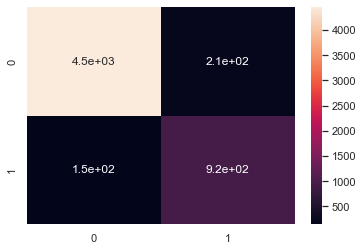

In [25]:
# dblp scholar clean character based
dist_train_char_2_1 = getDistanceChar(clean_train2['text_left'], clean_train2['text_right'])
real_train2_1 = toInt(clean_train2['label'])
t_train_char_2_1, f_train_char_2_1 = max_threshold(dist_train_char_2_1, real_train2_1)
print('dblp scholar clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_2_1))
print('f1 score of training set is:{}'.format(f_train_char_2_1))
dist_test_char_2_1 = getDistanceChar(clean_test2['text_left'], clean_test2['text_right'])
real_test2_1 = toInt(clean_test2['label'])
pre_list_char_2_1 = prediction(dist_test_char_2_1, t_train_char_2_1)
pre_char_2_1 = toInt(pre_list_char_2_1)
f_test_char_2_1 = f1_score(real_test2_1, pre_char_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_2_1))
print(classification_report(real_test2_1, pre_char_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_char_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [26]:
C2= confusion_matrix(real_test2_1, pre_list_char_2_1, labels=[0, 1])
print(C2)

[[4461  211]
 [ 146  924]]


In [27]:
# dblp scholar clean character based false positive (down left)
print("dblp scholar clean character based false positive")
for i in range(len(dist_test_char_2_1)):
    if(dist_test_char_2_1[i]<t_train_char_2_1 and real_test2_1[i]==0):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean character based false positive
37
advances in real-time database systems research a bestavros sigmod record 1996
special issue on real-time database systems a bestavros sigmod record ,
--------------------------------------
61
reminiscences on influential papers 2000
reminiscences on influential papers hgm stanlbrd sigmod record , 1998.0
--------------------------------------
83
panel : future directions of database research - the vldb broadening strategy , part 2 m brodie vldb 2000
future directions of database research hj schek , ml brodieâ ? ¦ vldb , cairo ,
--------------------------------------
143
a cost model for clustered object-oriented databases g gardarin , j gruser , z tang vldb 1995
an axiomatic model for deductive object-oriented databases zt kardkovacs , gm suranyi
--------------------------------------
173
multiple-view self-maintenance in data warehousing environments n huyn vldb 1997
algorithms for materialized view design in data warehousing enviro

--------------------------------------
4384
statistical schema matching across web query interfaces b he , k chang sigmod conference 2003
mining complex matchings across web query interfaces b he , kcc chang , j han
--------------------------------------
4491
temporal aggregation in active database rules i motakis , c zaniolo sigmod conference 1997
temporal conditions and integrity constraints in active database systems ap sistla , o wolfson sigmod conference , 1995.0
--------------------------------------
4536
book review column k aberer sigmod record 2002
book review column sm databases sigmod record , 2002.0
--------------------------------------
4542
probabilistic object bases t eiter , j lu , t lukasiewicz , v subrahmanian acm trans . database syst . 2001
temporal probabilistic object bases v biazzo , r giugno , t lukasiewicz , vs subrahmanian ieee transactions on knowledge and data engineering , 2003.0
--------------------------------------
4575
efficient resumption of interrupte

In [28]:
# dblp scholar clean character based false negative (top right)
print("dblp scholar clean character based false negative")
for i in range(len(dist_test_char_2_1)):
    if(dist_test_char_2_1[i]>=t_train_char_2_1 and real_test2_1[i]==1):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean character based false negative
67
composite events for active databases : semantics , contexts and detection s chakravarthy , v krishnaprasad , e anwar , s kim vldb 1994
composite events for active databases : semantics s chakravarthy , v krishnaprasad , e anwar , sk kim contexts , and detection , procs . of the 20th intâ ?? l conf . on & hellip ; ,
--------------------------------------
108
temporal queries in olap a mendelzon , a vaisman vldb 2000
temporal queries in olap ao mendelzon , aa vaisman proceedings of the 26th international conference on very & hellip ; , 2000.0
--------------------------------------
130
an approach for building secure database federations d jonscher , k dittrich vldb 1994
an approach for building secure database federations in jorge b. bocca and matthias jarke and carlo d jonscher , kr dittrich proceedings of 20th international conference on very large & hellip ; ,
--------------------------------------
139
objects and sql : strange rel

### crossparsing

dblp scholar clean character crossparsing
threshold of the training set is:0.29
f1 score of training set is:0.8883343730505303
f1 score of the testing set is:0.89014615747289
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4672
           1       0.90      0.88      0.89      1070

    accuracy                           0.96      5742
   macro avg       0.94      0.93      0.93      5742
weighted avg       0.96      0.96      0.96      5742

[[4565  107]
 [ 126  944]]


<AxesSubplot:>

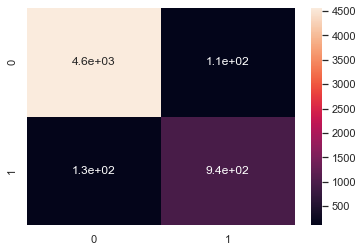

In [29]:
# dblp scholar clean crossparsing
dist_train_cross_2_1 = getDistanceCross(clean_train2['text_left'], clean_train2['text_right'])
real_train2_1 = toInt(clean_train2['label'])
t_train_cross_2_1, f_train_cross_2_1 = max_threshold(dist_train_cross_2_1, real_train2_1)
print('dblp scholar clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_2_1))
print('f1 score of training set is:{}'.format(f_train_cross_2_1))
dist_test_cross_2_1 = getDistanceCross(clean_test2['text_left'], clean_test2['text_right'])
real_test2_1 = toInt(clean_test2['label'])
pre_list_cross_2_1 = prediction(dist_test_cross_2_1, t_train_cross_2_1)
pre_cross_2_1 = toInt(pre_list_cross_2_1)
f_test_cross_2_1 = f1_score(real_test2_1, pre_cross_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_2_1))
print(classification_report(real_test2_1, pre_cross_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_cross_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [30]:
C2= confusion_matrix(real_test2_1, pre_list_cross_2_1, labels=[0, 1])
print(C2)

[[4565  107]
 [ 126  944]]


In [31]:
# dblp scholar clean crossparsing false positive
print("dblp scholar clean crossparsing false positive")
for i in range(len(dist_test_cross_2_1)):
    if(dist_test_cross_2_1[i]<t_train_cross_2_1 and real_test2_1[i]==0):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean crossparsing false positive
37
advances in real-time database systems research a bestavros sigmod record 1996
special issue on real-time database systems a bestavros sigmod record ,
--------------------------------------
120
dec data distributor : for data replication and data warehousing d dietterich sigmod conference 1994
pp. 1â ?? 12 . dietterich , dj 1994 . dec data distributor : for data replication and data warehousing a canada int . conf ,
--------------------------------------
190
guest editor 's introduction 2002
guest editor 's introduction : imaging in medical education p dev
--------------------------------------
231
database tuning : principles , experiments , and troubleshooting techniques ( part ii ) d shasha , p bonnet sigmod conference 2002
database tuning : principles d shasha , p bonnet experiments and troubleshooting techniques , morgan kaufmann ,
--------------------------------------
239
sqlj part 0 , now known as sql/olb ( object-language bindi

In [32]:
# dblp scholar clean crossparsing false negative
print("dblp scholar clean crossparsing false negative")
for i in range(len(dist_test_cross_2_1)):
    if(dist_test_cross_2_1[i]>=t_train_cross_2_1 and real_test2_1[i]==1):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean crossparsing false negative
108
temporal queries in olap a mendelzon , a vaisman vldb 2000
temporal queries in olap ao mendelzon , aa vaisman proceedings of the 26th international conference on very & hellip ; , 2000.0
--------------------------------------
109
self-similarity in the web s dill , r kumar , k mccurley , s rajagopalan , d sivakumar , a tomkins vldb 2001
self-similarity in the web d stephen , k ravi , m kevin , r sridhar , d sivakumar proc . vldbâ ?? 01 ,
--------------------------------------
130
an approach for building secure database federations d jonscher , k dittrich vldb 1994
an approach for building secure database federations in jorge b. bocca and matthias jarke and carlo d jonscher , kr dittrich proceedings of 20th international conference on very large & hellip ; ,
--------------------------------------
236
approximate frequency counts over data streams g manku , r motwani vldb 2002
approximate frequency counts over streaming data g manku , r

### token based

dblp scholar clean overlap
threshold of the training set is:0.67
f1 score of training set is:0.7991791263559074
f1 score of the testing set is:0.8137992038920832
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4672
           1       0.77      0.86      0.81      1070

    accuracy                           0.93      5742
   macro avg       0.87      0.90      0.88      5742
weighted avg       0.93      0.93      0.93      5742

[[4401  271]
 [ 150  920]]


<AxesSubplot:>

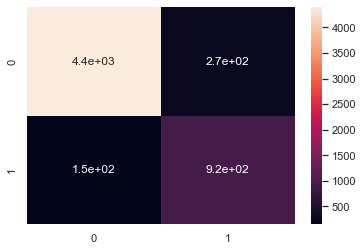

In [33]:
# dblp scholar clean overlap
coeff_train_overlap_2_1 = getCoeffOverlap(clean_train2['text_left'], clean_train2['text_right'])
real_train2_1 = toInt(clean_train2['label'])
t_train_overlap_2_1, f_train_overlap_2_1 = token_threshold(coeff_train_overlap_2_1, real_train2_1)
print('dblp scholar clean overlap')
print('threshold of the training set is:{}'.format(t_train_overlap_2_1))
print('f1 score of training set is:{}'.format(f_train_overlap_2_1))
coeff_test_overlap_2_1 = getCoeffOverlap(clean_test2['text_left'], clean_test2['text_right'])
real_test2_1 = toInt(clean_test2['label'])
pre_list_overlap_2_1 = token_prediction(coeff_test_overlap_2_1, t_train_overlap_2_1)
pre_overlap_2_1 = toInt(pre_list_overlap_2_1)
f_test_overlap_2_1 = f1_score(real_test2_1, pre_overlap_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_overlap_2_1))
print(classification_report(real_test2_1, pre_overlap_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_overlap_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [34]:
C2= confusion_matrix(real_test2_1, pre_list_overlap_2_1, labels=[0, 1])
print(C2)

[[4401  271]
 [ 150  920]]


In [35]:
# dblp scholar clean overlap false positive
print("dblp scholar clean overlap false positive")
for i in range(len(coeff_test_overlap_2_1)):
    if(coeff_test_overlap_2_1[i]>t_train_overlap_2_1 and real_test2_1[i]==0):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean overlap false positive
24
a system for keyword proximity search on xml databases a balmin , v hristidis , n koudas , y papakonstantinou , d srivastava , t wang vldb 2003
keyword search in databases sv rajnikant
--------------------------------------
35
processing sliding window multi-joins in continuous queries over data streams l golab , m жzsu vldb 2003
continuous queries over data streams s balu , j widom
--------------------------------------
37
advances in real-time database systems research a bestavros sigmod record 1996
special issue on real-time database systems a bestavros sigmod record ,
--------------------------------------
48
reminiscences on influential papers 1999
reminiscences on influential papers e bertino acm transactions on database systems , 1976.0
--------------------------------------
61
reminiscences on influential papers 2000
reminiscences on influential papers hgm stanlbrd sigmod record , 1998.0
--------------------------------------
95
remi

--------------------------------------
2419
state of the art in workflow management research and products 1996
world wide workflow : the vision and the state-of art in products and research d georgakopoulos dogac et
--------------------------------------
2445
editorial 2002
editorial d ralph , s searby bt technology journal , 2003.0
--------------------------------------
2454
book review column k aberer sigmod record 2002
book review column aao approach sigmod record , 2002.0
--------------------------------------
2480
keynote address 1995
keynote address t berners-lee seventh international world wide web conference
--------------------------------------
2522
efficient retrieval of similar shapes d rafiei , a mendelzon vldb j. 2002
efficient retrieval of similar time sequences using dft d rafiei , a mendelzon arxiv preprint cs.db / 9809033 , 1998.0
--------------------------------------
2557
continuously adaptive continuous queries over streams s madden , m shah , j hellerstein , v ram

3449
fast parallel similarity search in multimedia databases s berchtold , c bіhm , b braunmќller , d keim , h kriegel sigmod conference 1997
s3 : similarity search in cad database systems s berchtold , hp kriegel
--------------------------------------
3451
temporal database system implementations m bіhlen sigmod record 1995
implementation of data abstraction in the relational database system ingres j ong sigmod record , 1984.0
--------------------------------------
3510
guest editorial 2002
guest editor 's introduction n verloop international journal of educational research , 2001.0
--------------------------------------
3536
open object database management systems 1994
panel : user interfaces and database management systems tl anderson , g ariav proceedings of the 1986 acm sigmod international conference & hellip ; , 1986.0
--------------------------------------
3548
guest editor 's introduction 2002
guest editor 's introduction k aberer acm sigmod record , 2003.0
-------------------

4536
book review column k aberer sigmod record 2002
book review column sm databases sigmod record , 2002.0
--------------------------------------
4548
mining fuzzy association rules in databases c kuok , a fu , m wong sigmod record 1998
mining fuzzy association rules kcc chan , wh au
--------------------------------------
4598
guest editorial 2000
guest editorâ ?? s introduction tnd independence sigmod record , 2003.0
--------------------------------------
4735
strudel : a web-site management system m fernandez , d florescu , j kang , a levy , d suciu sigmod conference 1997
ã cents â ? ¬ å?catching the boat with strudel : experiences with a web-site management systemã cents â ? ¬ â ? mf fernandez , d florescu , j kang , ay levy , d suciu proc . of the acm sigmod
--------------------------------------
4745
guest editorial 2002
guest editorial c allocchio computer networks , 2000.0
--------------------------------------
4769
reminiscences on influential papers 2002
reminiscences on influ

In [36]:
# dblp scholar clean overlap false negative
print("dblp scholar clean overlap false negative")
for i in range(len(coeff_test_overlap_2_1)):
    if(coeff_test_overlap_2_1[i]<=t_train_overlap_2_1 and real_test2_1[i]==1):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean overlap false negative
49
deeds towards a distributed and active real-time database system s andler , j hansson , j eriksson , j mellin , m berndtsson , b eftring sigmod record 1996
andb . eftring , deeds : towards a distributed and active real-time database systems sf andler , j hansson , j eriksson , j mellin , m acm sigmod record ,
--------------------------------------
109
self-similarity in the web s dill , r kumar , k mccurley , s rajagopalan , d sivakumar , a tomkins vldb 2001
self-similarity in the web d stephen , k ravi , m kevin , r sridhar , d sivakumar proc . vldbâ ?? 01 ,
--------------------------------------
135
business-to-business interactions : issues and enabling technologies b medjahed , b benatallah , a bouguettaya , a ngu , a elmagarmid vldb j. 2003
b 2 b interactions : issues and enabling technologies b medjahed , b benatalla , a bouguettaya , ahh ngu , the vldb journal ,
--------------------------------------
247
extending practical pre-aggreg

--------------------------------------
3426
the third manifesto h darwen , c date sigmod record 1995
introducing the third manifesto h darwen , cj date database programming and design ,
--------------------------------------
3489
computing iceberg queries efficiently m fang , n shivakumar , h garcia-molina , r motwani , j ullman vldb 1998
computing iceberg queries efficiently n shivakumar , h garcia-molina tech . report , stanford database group tech . report , november
--------------------------------------
3531
webservice composition with o'grape and osiris r weber , c schuler , p neukomm , h schuldt , h schek vldb 2003
und schek , h.-j. : web service composition with oâ ?? grape and osiris r weber , c schuler , p neukomm , h schuldt proceedings of the 29th international conference on very
--------------------------------------
3532
on the discovery of interesting patterns in association rules s ramaswamy , s mahajan , a silberschatz vldb 1998
on the discovery of interesting patterns

--------------------------------------
4653
schema-driven customization of web services s abiteboul , b amann , j baumgarten , o benjelloun , f ngoc , t milo vldb 2003
schema-driven customization of web services s abiteboul , b amann , j baumgarten , o benjelloun , proceedings of the international conference on very large & hellip ; , 2003.0
--------------------------------------
4773
amicalola report : database and information system research challenges and opportunities in semantic web and enterprises a sheth , r meersman sigmod record 2002
database and information systems research database and information systems research for semantic web a sheth , r meersman
--------------------------------------
4817
carnot and infosleuth : database technology and the world wide web d woelk , w bohrer , n jacobs , k ong , c tomlinson , c unnikrishnan sigmod conference 1995
carnot and infosleuth : database technology and the world wide web . acms anthology , p edition
------------------------------

dblp scholar clean jaccard
threshold of the training set is:0.47000000000000003
f1 score of training set is:0.8724690238742823
f1 score of the testing set is:0.8782051282051282
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4672
           1       0.86      0.90      0.88      1070

    accuracy                           0.95      5742
   macro avg       0.92      0.93      0.92      5742
weighted avg       0.95      0.95      0.95      5742

[[4517  155]
 [ 111  959]]


<AxesSubplot:>

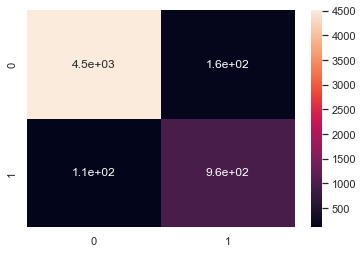

In [37]:
# dblp scholar clean jaccard
coeff_train_jaccard_2_1 = getCoeffJaccard(clean_train2['text_left'], clean_train2['text_right'])
real_train1_2 = toInt(clean_train1['label'])
t_train_jaccard_2_1, f_train_jaccard_2_1 = token_threshold(coeff_train_jaccard_2_1, real_train2_1)
print('dblp scholar clean jaccard')
print('threshold of the training set is:{}'.format(t_train_jaccard_2_1))
print('f1 score of training set is:{}'.format(f_train_jaccard_2_1))
coeff_test_jaccard_2_1 = getCoeffJaccard(clean_test2['text_left'], clean_test2['text_right'])
real_test2_1 = toInt(clean_test2['label'])
pre_list_jaccard_2_1 = token_prediction(coeff_test_jaccard_2_1, t_train_jaccard_2_1)
pre_jaccard_2_1 = toInt(pre_list_jaccard_2_1)
f_test_jaccard_2_1 = f1_score(real_test2_1, pre_jaccard_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_jaccard_2_1))
print(classification_report(real_test2_1, pre_jaccard_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_jaccard_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [38]:
C2= confusion_matrix(real_test2_1, pre_list_jaccard_2_1, labels=[0, 1])
print(C2)

[[4517  155]
 [ 111  959]]


In [39]:
# dblp scholar clean jaccard false positive
print("dblp scholar clean jaccard false positive")
for i in range(len(coeff_test_jaccard_2_1)):
    if(coeff_test_jaccard_2_1[i]>t_train_jaccard_2_1 and real_test2_1[i]==0):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean jaccard false positive
37
advances in real-time database systems research a bestavros sigmod record 1996
special issue on real-time database systems a bestavros sigmod record ,
--------------------------------------
61
reminiscences on influential papers 2000
reminiscences on influential papers hgm stanlbrd sigmod record , 1998.0
--------------------------------------
120
dec data distributor : for data replication and data warehousing d dietterich sigmod conference 1994
pp. 1â ?? 12 . dietterich , dj 1994 . dec data distributor : for data replication and data warehousing a canada int . conf ,
--------------------------------------
231
database tuning : principles , experiments , and troubleshooting techniques ( part ii ) d shasha , p bonnet sigmod conference 2002
database tuning : principles d shasha , p bonnet experiments and troubleshooting techniques , morgan kaufmann ,
--------------------------------------
239
sqlj part 0 , now known as sql/olb ( object-languag

4330
ratio rules : a new paradigm for fast , quantifiable data mining f korn , a labrinidis , y kotidis , c faloutsos vldb 1998
quantifiable data mining using ratio rules f korn , a labrinidis , y kotidis , c faloutsos the vldb journal the international journal on very large & hellip ; , 2000.0
--------------------------------------
4536
book review column k aberer sigmod record 2002
book review column sm databases sigmod record , 2002.0
--------------------------------------
4612
closest pair queries in spatial databases a corral , y manolopoulos , y theodoridis , m vassilakopoulos sigmod conference 2000
algorithms for processing k-closest-pair queries in spatial databases a corral , y manolopoulos , y theodoridis , m data & knowledge engineering , 2004.0
--------------------------------------
4729
data-driven , one-to-one web site generation for data-intensive applications s ceri , p fraternali , s paraboschi vldb 1999
design principles for data-intensive web sites s ceri , p fratern

In [40]:
# dblp scholar clean jaccard false negative
print("dblp scholar clean jaccard false negative")
for i in range(len(coeff_test_jaccard_2_1)):
    if(coeff_test_jaccard_2_1[i]<=t_train_jaccard_2_1 and real_test2_1[i]==1):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean jaccard false negative
108
temporal queries in olap a mendelzon , a vaisman vldb 2000
temporal queries in olap ao mendelzon , aa vaisman proceedings of the 26th international conference on very & hellip ; , 2000.0
--------------------------------------
109
self-similarity in the web s dill , r kumar , k mccurley , s rajagopalan , d sivakumar , a tomkins vldb 2001
self-similarity in the web d stephen , k ravi , m kevin , r sridhar , d sivakumar proc . vldbâ ?? 01 ,
--------------------------------------
130
an approach for building secure database federations d jonscher , k dittrich vldb 1994
an approach for building secure database federations in jorge b. bocca and matthias jarke and carlo d jonscher , kr dittrich proceedings of 20th international conference on very large & hellip ; ,
--------------------------------------
237
w3qs : a query system for the world-wide web d konopnicki , o shmueli vldb 1995
w3qs : a query system for the world-wide webâ '' in proceeding

--------------------------------------
3729
scientific olap for the biotech domain n huyn vldb 2001
scientific olap for the biotech domain n huyn proceedings of the international conference on very large & hellip ; , 2001.0
--------------------------------------
3770
scientific journals : extinction or explosion ? ( panel ) r ramakrishnan , h garcia-molina , g rossbach , a silberschatz , g wiederhold , j zijlstra vldb 1995
scientific journals : extinction or explosion ? r ramakrishnan proceedings of the international conference on very large & hellip ; , 1995.0
--------------------------------------
3813
do n't scrap it , wrap it ! a wrapper architecture for legacy data sources m roth , p schwarz vldb 1997
do n't scrap it , wrap it ! a wrapper architecture for legacy data sources [ a ] , dayal u , gray pmd , rm tork , p schwarz proceedings of the 23rd international conference on very & hellip ; , 1997.0
--------------------------------------
3867
the multiview project : object-oriented

dblp scholar clean dice
threshold of the training set is:0.54
f1 score of training set is:0.8522055479763528
f1 score of the testing set is:0.860370537731586
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4672
           1       0.83      0.89      0.86      1070

    accuracy                           0.95      5742
   macro avg       0.90      0.92      0.91      5742
weighted avg       0.95      0.95      0.95      5742

[[4481  191]
 [ 118  952]]


<AxesSubplot:>

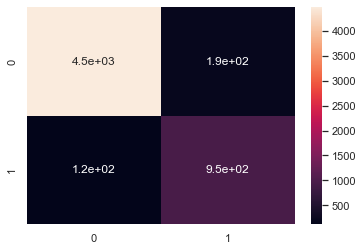

In [41]:
# dblp scholar clean dice
coeff_train_dice_2_1 = getCoeffDice(clean_train2['text_left'], clean_train2['text_right'])
real_train2_1 = toInt(clean_train2['label'])
t_train_dice_2_1, f_train_dice_2_1 = token_threshold(coeff_train_dice_2_1, real_train2_1)
print('dblp scholar clean dice')
print('threshold of the training set is:{}'.format(t_train_dice_2_1))
print('f1 score of training set is:{}'.format(f_train_dice_2_1))
coeff_test_dice_2_1 = getCoeffDice(clean_test2['text_left'], clean_test2['text_right'])
real_test2_1 = toInt(clean_test2['label'])
pre_list_dice_2_1 = token_prediction(coeff_test_dice_2_1, t_train_dice_2_1)
pre_dice_2_1 = toInt(pre_list_dice_2_1)
f_test_dice_2_1 = f1_score(real_test2_1, pre_dice_2_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_dice_2_1))
print(classification_report(real_test2_1, pre_dice_2_1))
sns.set()
C2= confusion_matrix(real_test2_1, pre_list_dice_2_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [42]:
C2= confusion_matrix(real_test2_1, pre_list_dice_2_1, labels=[0, 1])
print(C2)

[[4481  191]
 [ 118  952]]


In [43]:
# dblp scholar clean dice false positive
print("dblp scholar clean dice false positive")
for i in range(len(coeff_test_dice_2_1)):
    if(coeff_test_dice_2_1[i]>t_train_dice_2_1 and real_test2_1[i]==0):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean dice false positive
37
advances in real-time database systems research a bestavros sigmod record 1996
special issue on real-time database systems a bestavros sigmod record ,
--------------------------------------
48
reminiscences on influential papers 1999
reminiscences on influential papers e bertino acm transactions on database systems , 1976.0
--------------------------------------
61
reminiscences on influential papers 2000
reminiscences on influential papers hgm stanlbrd sigmod record , 1998.0
--------------------------------------
83
panel : future directions of database research - the vldb broadening strategy , part 2 m brodie vldb 2000
future directions of database research hj schek , ml brodieâ ? ¦ vldb , cairo ,
--------------------------------------
120
dec data distributor : for data replication and data warehousing d dietterich sigmod conference 1994
pp. 1â ?? 12 . dietterich , dj 1994 . dec data distributor : for data replication and data warehousing a 

tutorial : designing an ultra highly available dbms . se bratsberg
--------------------------------------
897
comparative analysis of five xml query languages a bonifati , s ceri sigmod record 2000
comparative analysis of six xml schema languages . acms anthology sigmod record , 2000.0
--------------------------------------
902
the lham log-structured history data access method p muth , p o'neil , a pick , g weikum vldb j. 2000
a log-structured history data access method ( lham ) , g weikum
--------------------------------------
907
a-topss - a publish/subscribe system supporting approximate matching h liu , h jacobsen vldb 2002
a-topss : a publish/subscribe system supporting imperfect information processing h liu , ha jacobsen
--------------------------------------
922
towards a richer web object model f manola sigmod record 1998
towards a web object model f manola
--------------------------------------
959
toward recovery-oriented computing a fox vldb 2002
approaches to recovery-orie

2352
implementing lazy database updates for an object database system f ferrandina , t meyer , r zicari vldb 1994
correctness of lazy database updates for object database systems f ferrandina , t meyer , r zicari
--------------------------------------
2356
report on the 1995 international workshop on temporal databases 1995
international workshop on web and databases c san diego
--------------------------------------
2382
sonar : system for optimized numeric associationrules t fukuda , y morimoto , s morishita , t tokuyama sigmod conference 1996
data mining using two-dimensional optimized association rules for numeric attributes : scheme , t fukuda , y morimoto , s morishita , t tokuyama acm sigmod conference proceedings ,
--------------------------------------
2404
algorithms for materialized view design in data warehousing environment j yang , k karlapalem , q li vldb 1997
evaluation of materialized view indexing in data warehousing environments l bellatreche , k karlapalem , q li
--

4103
retrieval of composite multimedia objects s chaudhuri , s ghandeharizadeh , c shahabi vldb 1995
on scheduling atomic and composite multimedia objects c shahabi , s ghandeharizadeh , s chaudhuri
--------------------------------------
4119
analysis of predictive spatio-temporal queries y tao , j sun , d papadias acm trans . database syst . 2003
selectivity estimation for predictive spatio-temporal queries y tao , j sun , d papadias
--------------------------------------
4138
s3 : similarity search in cad database systems s berchtold , h kriegel sigmod conference 1997
fast parallel similarity search in multimedia databases s berchtold sigmod conference , 1997.0
--------------------------------------
4157
a user-centered interface for querying distributed multimedia databases i cruz , k james sigmod conference 1999
user interface for distributed multimedia database querying with mediator supported refinement if cruz , km james
--------------------------------------
4197
flexible suppo

In [44]:
# dblp scholar clean dice false negative
print("dblp scholar clean dice false negative")
for i in range(len(coeff_test_dice_2_1)):
    if(coeff_test_dice_2_1[i]<=t_train_dice_2_1 and real_test2_1[i]==1):
        s1 = clean_test2['text_left'].iloc[i]
        s2 = clean_test2['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

dblp scholar clean dice false negative
108
temporal queries in olap a mendelzon , a vaisman vldb 2000
temporal queries in olap ao mendelzon , aa vaisman proceedings of the 26th international conference on very & hellip ; , 2000.0
--------------------------------------
109
self-similarity in the web s dill , r kumar , k mccurley , s rajagopalan , d sivakumar , a tomkins vldb 2001
self-similarity in the web d stephen , k ravi , m kevin , r sridhar , d sivakumar proc . vldbâ ?? 01 ,
--------------------------------------
130
an approach for building secure database federations d jonscher , k dittrich vldb 1994
an approach for building secure database federations in jorge b. bocca and matthias jarke and carlo d jonscher , kr dittrich proceedings of 20th international conference on very large & hellip ; ,
--------------------------------------
237
w3qs : a query system for the world-wide web d konopnicki , o shmueli vldb 1995
w3qs : a query system for the world-wide webâ '' in proceedings o

--------------------------------------
3538
a foundation for representing and quering moving objects r gќting , m bіhlen , m erwig , c jensen , n lorentzos , m schneider , m vazirgiannis acm trans . database syst . 2000
ba foundation for representing and querying moving objects , â ?? â ?? rh gã 1/4 ting , mh bã ¶ hlen , m erwig , cs jensen , na acm transactions on database
--------------------------------------
3539
timber : a native xml database h jagadish , s al-khalifa , a chapman , l lakshmanan , a nierman , s paparizos , j patel , d srivastava , n wiwatwattana , y wu , c yu vldb j. 2002
timber : a native xml database hv jagadish , s al-khalifa , a chapman , lvs the vldb journal the international journal on very large & hellip ; , 2002.0
--------------------------------------
3543
projecting xml documents a marian , j simщon vldb 2003
projecting xml documents a marian , j simeon proceedings of the international conference on very large & hellip ; , 2003.0
-------------------------

## amazon itunes

### character based

amazon itunes clean character based method
threshold of the training set is:0.59
f1 score of training set is:0.4916666666666667
f1 score of the testing set is:0.4675324675324675
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        82
           1       0.36      0.67      0.47        27

    accuracy                           0.62       109
   macro avg       0.60      0.64      0.59       109
weighted avg       0.73      0.62      0.65       109

[[50 32]
 [ 9 18]]


<AxesSubplot:>

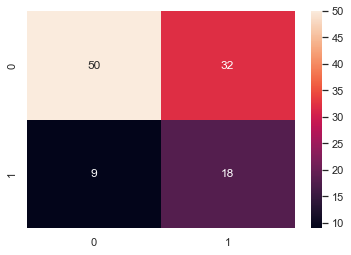

In [45]:
# amazon itunes clean character based
dist_train_char_3_1 = getDistanceChar(clean_train3['text_left'], clean_train3['text_right'])
real_train3_1 = toInt(clean_train3['label'])
t_train_char_3_1, f_train_char_3_1 = max_threshold(dist_train_char_3_1, real_train3_1)
print('amazon itunes clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_3_1))
print('f1 score of training set is:{}'.format(f_train_char_3_1))
dist_test_char_3_1 = getDistanceChar(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_char_3_1 = prediction(dist_test_char_3_1, t_train_char_3_1)
pre_char_3_1 = toInt(pre_list_char_3_1)
f_test_char_3_1 = f1_score(real_test3_1, pre_char_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_3_1))
print(classification_report(real_test3_1, pre_char_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_char_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [46]:
C2= confusion_matrix(real_test3_1, pre_list_char_3_1, labels=[0, 1])
print(C2)

[[50 32]
 [ 9 18]]


In [47]:
# amazon itunes clean character based false positive (down left)
print("amazon itunes clean character based false positive")
for i in range(len(dist_test_char_3_1)):
    if(dist_test_char_3_1[i]<t_train_char_3_1 and real_test3_1[i]==0):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean character based false positive
1
The Woodland Realm ( Extended Version ) Howard Shore The Hobbit : The Desolation of Smaug ( Original Motion Picture Soundtrack ) [ Special Edition ] Soundtrack , Music , Soundtrack , Classical , Original Score $ 1.29 ‰ ãÑ 2013 WaterTower Music 5:14 10-Dec-13
The High Fells ( Extended Version ) Howard Shore The Hobbit : The Desolation of Smaug ( Original Motion Picture Soundtrack ) [ Special Edition ] Soundtracks $ 1.29 2013 WaterTower Music / Warner Bros. . Entertainment / Metro - Goldwyn Mayer Pictures Inc. 3:38 December 10 , 2013
--------------------------------------
8
VHS Outro ( Interlude ) X Ambassadors VHS Alternative , Music , Rock , Adult Alternative $ 1.29 2015 KIDinaKORNER/Interscope Records 1:25 30-Jun-15
Moving Day ( Interlude ) X Ambassadors VHS [ Explicit ] Alternative Rock $ 1.29 ( C ) 2015 KIDinaKORNER/Interscope Records 0:19 June 30 , 2015
--------------------------------------
14
Lifted ( feat . Emeli Sand ' © & Pr

In [48]:
# amazon itunes clean character based false negative (top right)
print("amazon itunes clean character based false negative")
for i in range(len(dist_test_char_3_1)):
    if(dist_test_char_3_1[i]>=t_train_char_3_1 and real_test3_1[i]==1):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean character based false negative
15
45 Shinedown Leave a Whisper Rock , Music , Hard Rock , Alternative $ 1.29 2003 Atlantic Recording Corporation for the United States and WEA International for the world outside of the United States 4:09 27-May-03
45 Shinedown Leave A Whisper Rock $ 1.29 2015 Mad Decent 4:09 May 27 , 2003
--------------------------------------
35
Outversion Mark Ronson Version Pop , Music , R&B / Soul,Soul,Dance,Rock,Jazz,Hip-Hop / Rap,Electronic,Hip-Hop , Pop/Rock , Adult Alternative $ 0.99 2007 Mark Ronson under exclusive license to SONY BMG MUSIC ENTERTAINMENT ( UK ) Limited except Track 9 ( P ) 2006 Rapster Records / BBE Records 1:50 10-Jul-07
Outversion Mark Ronson Version [ Explicit ] Pop $ 0.99 ( c ) 2011 J'adore Records 1:50 July 10 , 2007
--------------------------------------
45
Rashi ( Outro ) Mark Ronson Here Comes the Fuzz Dance,Music,Hip-Hop / Rap , Alternative Rap,Hip-Hop , R&B / Soul , Soul , Electronic $ 0.99 2003 Elektra Entertainme

### crossparsing

amazon itunes clean character crossparsing
threshold of the training set is:0.4
f1 score of training set is:0.5254237288135593
f1 score of the testing set is:0.5063291139240507
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        82
           1       0.38      0.74      0.51        27

    accuracy                           0.64       109
   macro avg       0.63      0.68      0.61       109
weighted avg       0.76      0.64      0.67       109

[[50 32]
 [ 7 20]]


<AxesSubplot:>

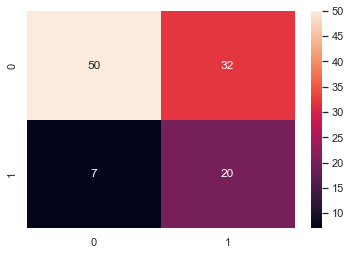

In [49]:
# amazon itunes clean crossparsing
dist_train_cross_3_1 = getDistanceCross(clean_train3['text_left'], clean_train3['text_right'])
real_train3_1 = toInt(clean_train3['label'])
t_train_cross_3_1, f_train_cross_3_1 = max_threshold(dist_train_cross_3_1, real_train3_1)
print('amazon itunes clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_3_1))
print('f1 score of training set is:{}'.format(f_train_cross_3_1))
dist_test_cross_3_1 = getDistanceCross(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_cross_3_1 = prediction(dist_test_cross_3_1, t_train_cross_3_1)
pre_cross_3_1 = toInt(pre_list_cross_3_1)
f_test_cross_3_1 = f1_score(real_test3_1, pre_cross_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_3_1))
print(classification_report(real_test3_1, pre_cross_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_cross_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [50]:
C2= confusion_matrix(real_test3_1, pre_list_cross_3_1, labels=[0, 1])
print(C2)

[[50 32]
 [ 7 20]]


In [51]:
# amazon itunes clean crossparsing false positive
print("amazon itunes clean crossparsing false positive")
for i in range(len(dist_test_cross_3_1)):
    if(dist_test_cross_3_1[i]<t_train_cross_3_1 and real_test3_1[i]==0):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean crossparsing false positive
1
The Woodland Realm ( Extended Version ) Howard Shore The Hobbit : The Desolation of Smaug ( Original Motion Picture Soundtrack ) [ Special Edition ] Soundtrack , Music , Soundtrack , Classical , Original Score $ 1.29 ‰ ãÑ 2013 WaterTower Music 5:14 10-Dec-13
The High Fells ( Extended Version ) Howard Shore The Hobbit : The Desolation of Smaug ( Original Motion Picture Soundtrack ) [ Special Edition ] Soundtracks $ 1.29 2013 WaterTower Music / Warner Bros. . Entertainment / Metro - Goldwyn Mayer Pictures Inc. 3:38 December 10 , 2013
--------------------------------------
4
Dangerous ( feat . Sam Martin ) [ Robin Schulz Remix ] [ Radio Edit ] David Guetta Listen ( Deluxe Version ) Dance , Music , Rock , House , Electronic , French Pop $ 1.29 2014 What A Music Ltd. under exclusive license to Parlophone/Warner Music France , under exclusive license to Atlantic Recording Corporation for the United States . All rights reserved . 3:20 24-Nov-1

In [52]:
# amazon itunes clean crossparsing false negative
print("amazon itunes clean crossparsing false negative")
for i in range(len(dist_test_cross_3_1)):
    if(dist_test_cross_3_1[i]>=t_train_cross_3_1 and real_test3_1[i]==1):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean crossparsing false negative
13
Anything Goes Florida Georgia Line Anything Goes Country , Music , Honky Tonk , Urban Cowboy , Contemporary Country $ 1.29 ‰ ãÑ 2014 Big Machine Label Group , LLC 3:39 14-Oct-14
Anything Goes Florida Georgia Line Anything Goes Country $ 1.29 ( C ) 2014 Republic Records , a Division of UMG Recordings , Inc. ( Republic Nashville ) 3:38 October 14 , 2014
--------------------------------------
15
45 Shinedown Leave a Whisper Rock , Music , Hard Rock , Alternative $ 1.29 2003 Atlantic Recording Corporation for the United States and WEA International for the world outside of the United States 4:09 27-May-03
45 Shinedown Leave A Whisper Rock $ 1.29 2015 Mad Decent 4:09 May 27 , 2003
--------------------------------------
35
Outversion Mark Ronson Version Pop , Music , R&B / Soul,Soul,Dance,Rock,Jazz,Hip-Hop / Rap,Electronic,Hip-Hop , Pop/Rock , Adult Alternative $ 0.99 2007 Mark Ronson under exclusive license to SONY BMG MUSIC ENTERTAINMENT (

### token based

amazon itunes clean overlap
threshold of the training set is:0.59
f1 score of training set is:0.6832298136645963
f1 score of the testing set is:0.6461538461538462
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        82
           1       0.55      0.78      0.65        27

    accuracy                           0.79       109
   macro avg       0.73      0.79      0.75       109
weighted avg       0.83      0.79      0.80       109

[[65 17]
 [ 6 21]]


<AxesSubplot:>

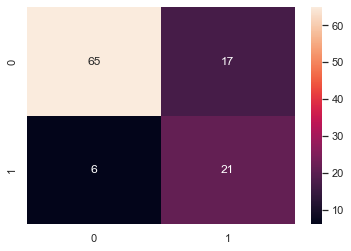

In [53]:
# amazon itunes clean overlap
coeff_train_overlap_3_1 = getCoeffOverlap(clean_train3['text_left'], clean_train3['text_right'])
real_train3_1 = toInt(clean_train3['label'])
t_train_overlap_3_1, f_train_overlap_3_1 = token_threshold(coeff_train_overlap_3_1, real_train3_1)
print('amazon itunes clean overlap')
print('threshold of the training set is:{}'.format(t_train_overlap_3_1))
print('f1 score of training set is:{}'.format(f_train_overlap_3_1))
coeff_test_overlap_3_1 = getCoeffOverlap(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_overlap_3_1 = token_prediction(coeff_test_overlap_3_1, t_train_overlap_3_1)
pre_overlap_3_1 = toInt(pre_list_overlap_3_1)
f_test_overlap_3_1 = f1_score(real_test3_1, pre_overlap_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_overlap_3_1))
print(classification_report(real_test3_1, pre_overlap_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_overlap_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [54]:
C2= confusion_matrix(real_test3_1, pre_list_overlap_3_1, labels=[0, 1])
print(C2)

[[65 17]
 [ 6 21]]


In [55]:
# amazon itunes clean overlap false positive
print("amazon itunes clean overlap false positive")
for i in range(len(coeff_test_overlap_3_1)):
    if(coeff_test_overlap_3_1[i]>t_train_overlap_3_1 and real_test3_1[i]==0):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean overlap false positive
8
VHS Outro ( Interlude ) X Ambassadors VHS Alternative , Music , Rock , Adult Alternative $ 1.29 2015 KIDinaKORNER/Interscope Records 1:25 30-Jun-15
Moving Day ( Interlude ) X Ambassadors VHS [ Explicit ] Alternative Rock $ 1.29 ( C ) 2015 KIDinaKORNER/Interscope Records 0:19 June 30 , 2015
--------------------------------------
10
Talk Dirty ( feat . 2 Chainz ) [ TJR Remix ] Jason Derulo Talk Dirty ( feat . 2 Chainz ) [ TJR Remix ] - Single Pop , Music , R&B / Soul , Rock , Dance , Contemporary R&B $ 1.29 2014 Warner Bros. . Records Inc. 4:07 2-May-14
Kama Sutra ( feat . Kid Ink ) Jason Derulo Talk Dirty [ Clean ] Pop $ 1.29 2014 Warner Bros. . Records Inc. 3:36 September 10 , 2013
--------------------------------------
14
Lifted ( feat . Emeli Sand ' © & Professor Green ) Naughty Boy Hotel Cabana ( Deluxe Version ) Pop , Music , Rock , R&B / Soul , Contemporary R&B , Dance,Electronic,Hip-Hop / Rap , Pop/Rock $ 1.29 2013 Naughty Boy Recordin

In [56]:
# amazon itunes clean overlap false negative
print("amazon itunes clean overlap false negative")
for i in range(len(coeff_test_overlap_3_1)):
    if(coeff_test_overlap_3_1[i]<=t_train_overlap_3_1 and real_test3_1[i]==1):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean overlap false negative
12
Here 's to the Good Times Florida Georgia Line Here 's to the Good Times Country , Music , Urban Cowboy , Honky Tonk , Contemporary Country $ 1.29 ‰ ãÑ 2012 Big Machine Label Group , LLC 4:11 4-Dec-12
Here 's To The Good Times Florida Georgia Line Here 's To The Good Times Country $ 1.29 ( C ) 2012 Big Machine Label Group , LLC 4:10 December 4 , 2012
--------------------------------------
13
Anything Goes Florida Georgia Line Anything Goes Country , Music , Honky Tonk , Urban Cowboy , Contemporary Country $ 1.29 ‰ ãÑ 2014 Big Machine Label Group , LLC 3:39 14-Oct-14
Anything Goes Florida Georgia Line Anything Goes Country $ 1.29 ( C ) 2014 Republic Records , a Division of UMG Recordings , Inc. ( Republic Nashville ) 3:38 October 14 , 2014
--------------------------------------
45
Rashi ( Outro ) Mark Ronson Here Comes the Fuzz Dance,Music,Hip-Hop / Rap , Alternative Rap,Hip-Hop , R&B / Soul , Soul , Electronic $ 0.99 2003 Elektra Entertainm

amazon itunes clean jaccard
threshold of the training set is:0.56
f1 score of training set is:0.5263157894736842
f1 score of the testing set is:0.48
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        82
           1       0.52      0.44      0.48        27

    accuracy                           0.76       109
   macro avg       0.67      0.66      0.66       109
weighted avg       0.75      0.76      0.75       109

[[71 11]
 [15 12]]


<AxesSubplot:>

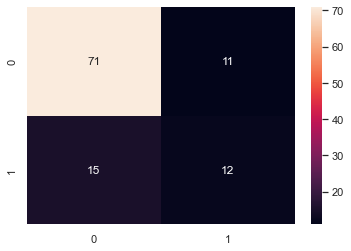

In [57]:
# amazon itunes clean jaccard
coeff_train_jaccard_3_1 = getCoeffJaccard(clean_train3['text_left'], clean_train3['text_right'])
real_train1_3 = toInt(clean_train3['label'])
t_train_jaccard_3_1, f_train_jaccard_3_1 = token_threshold(coeff_train_jaccard_3_1, real_train3_1)
print('amazon itunes clean jaccard')
print('threshold of the training set is:{}'.format(t_train_jaccard_3_1))
print('f1 score of training set is:{}'.format(f_train_jaccard_3_1))
coeff_test_jaccard_3_1 = getCoeffJaccard(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_jaccard_3_1 = token_prediction(coeff_test_jaccard_3_1, t_train_jaccard_3_1)
pre_jaccard_3_1 = toInt(pre_list_jaccard_3_1)
f_test_jaccard_3_1 = f1_score(real_test3_1, pre_jaccard_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_jaccard_3_1))
print(classification_report(real_test3_1, pre_jaccard_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_jaccard_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [58]:
C2= confusion_matrix(real_test3_1, pre_list_jaccard_3_1, labels=[0, 1])
print(C2)

[[71 11]
 [15 12]]


In [59]:
# amazon itunes clean jaccard false positive
print("amazon itunes clean jaccard false positive")
for i in range(len(coeff_test_jaccard_3_1)):
    if(coeff_test_jaccard_3_1[i]>t_train_jaccard_3_1 and real_test3_1[i]==0):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean jaccard false positive
8
VHS Outro ( Interlude ) X Ambassadors VHS Alternative , Music , Rock , Adult Alternative $ 1.29 2015 KIDinaKORNER/Interscope Records 1:25 30-Jun-15
Moving Day ( Interlude ) X Ambassadors VHS [ Explicit ] Alternative Rock $ 1.29 ( C ) 2015 KIDinaKORNER/Interscope Records 0:19 June 30 , 2015
--------------------------------------
27
Remember You ( feat . The Weeknd ) Wiz Khalifa O.N.I.F.C. ( Deluxe Version ) Hip-Hop/Rap , Music , Hardcore Rap , East Coast Rap , Rap $ 1.99 2012 Atlantic Recording Corporation for the United States and WEA International Inc. for the world outside of the United States 5:20 4-Dec-12
It 's Nothin ( feat . 2 Chainz ) [ Explicit ] Wiz Khalifa O.N.I.F.C. [ Explicit ] Rap & Hip-Hop $ 1.29 2012 Atlantic Recording Corporation for the United States and WEA International Inc. for the world outside of the United States 3:47 December 4 , 2012
--------------------------------------
28
Latch ( feat . Sam Smith ) Disclosure Sett

In [60]:
# amazon itunes clean jaccard false negative
print("amazon itunes clean jaccard false negative")
for i in range(len(coeff_test_jaccard_3_1)):
    if(coeff_test_jaccard_3_1[i]<=t_train_jaccard_3_1 and real_test3_1[i]==1):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean jaccard false negative
2
Extra Extra Credit Wiz Khalifa Flight School Hip-Hop/Rap , Music $ 0.99 2009 Rostrum Records 4:03 17-Apr-09
Extra Extra Credit [ Explicit ] Wiz Khalifa Flight School [ Explicit ] Rap & Hip-Hop $ 0.99 2013 Mad Decent 4:03 April 17 , 2009
--------------------------------------
13
Anything Goes Florida Georgia Line Anything Goes Country , Music , Honky Tonk , Urban Cowboy , Contemporary Country $ 1.29 ‰ ãÑ 2014 Big Machine Label Group , LLC 3:39 14-Oct-14
Anything Goes Florida Georgia Line Anything Goes Country $ 1.29 ( C ) 2014 Republic Records , a Division of UMG Recordings , Inc. ( Republic Nashville ) 3:38 October 14 , 2014
--------------------------------------
15
45 Shinedown Leave a Whisper Rock , Music , Hard Rock , Alternative $ 1.29 2003 Atlantic Recording Corporation for the United States and WEA International for the world outside of the United States 4:09 27-May-03
45 Shinedown Leave A Whisper Rock $ 1.29 2015 Mad Decent 4:09 May 2

amazon itunes clean dice
threshold of the training set is:0.49
f1 score of training set is:0.558659217877095
f1 score of the testing set is:0.45901639344262296
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.41      0.52      0.46        27

    accuracy                           0.70       109
   macro avg       0.62      0.64      0.62       109
weighted avg       0.72      0.70      0.71       109

[[62 20]
 [13 14]]


<AxesSubplot:>

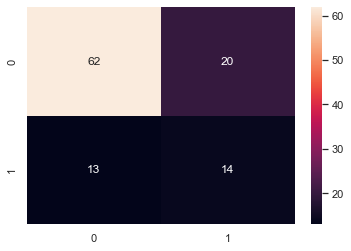

In [61]:
# amazon itunes clean dice
coeff_train_dice_3_1 = getCoeffDice(clean_train3['text_left'], clean_train3['text_right'])
real_train3_1 = toInt(clean_train3['label'])
t_train_dice_3_1, f_train_dice_3_1 = token_threshold(coeff_train_dice_3_1, real_train3_1)
print('amazon itunes clean dice')
print('threshold of the training set is:{}'.format(t_train_dice_3_1))
print('f1 score of training set is:{}'.format(f_train_dice_3_1))
coeff_test_dice_3_1 = getCoeffDice(clean_test3['text_left'], clean_test3['text_right'])
real_test3_1 = toInt(clean_test3['label'])
pre_list_dice_3_1 = token_prediction(coeff_test_dice_3_1, t_train_dice_3_1)
pre_dice_3_1 = toInt(pre_list_dice_3_1)
f_test_dice_3_1 = f1_score(real_test3_1, pre_dice_3_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_dice_3_1))
print(classification_report(real_test3_1, pre_dice_3_1))
sns.set()
C2= confusion_matrix(real_test3_1, pre_list_dice_3_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [62]:
C2= confusion_matrix(real_test3_1, pre_list_dice_3_1, labels=[0, 1])
print(C2)

[[62 20]
 [13 14]]


In [63]:
# amazon itunes clean dice false positive
print("amazon itunes clean dice false positive")
for i in range(len(coeff_test_dice_3_1)):
    if(coeff_test_dice_3_1[i]>t_train_dice_3_1 and real_test3_1[i]==0):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean dice false positive
1
The Woodland Realm ( Extended Version ) Howard Shore The Hobbit : The Desolation of Smaug ( Original Motion Picture Soundtrack ) [ Special Edition ] Soundtrack , Music , Soundtrack , Classical , Original Score $ 1.29 ‰ ãÑ 2013 WaterTower Music 5:14 10-Dec-13
The High Fells ( Extended Version ) Howard Shore The Hobbit : The Desolation of Smaug ( Original Motion Picture Soundtrack ) [ Special Edition ] Soundtracks $ 1.29 2013 WaterTower Music / Warner Bros. . Entertainment / Metro - Goldwyn Mayer Pictures Inc. 3:38 December 10 , 2013
--------------------------------------
8
VHS Outro ( Interlude ) X Ambassadors VHS Alternative , Music , Rock , Adult Alternative $ 1.29 2015 KIDinaKORNER/Interscope Records 1:25 30-Jun-15
Moving Day ( Interlude ) X Ambassadors VHS [ Explicit ] Alternative Rock $ 1.29 ( C ) 2015 KIDinaKORNER/Interscope Records 0:19 June 30 , 2015
--------------------------------------
14
Lifted ( feat . Emeli Sand ' © & Professor Gre

In [64]:
# amazon itunes clean dice false negative
print("amazon itunes clean dice false negative")
for i in range(len(coeff_test_dice_3_1)):
    if(coeff_test_dice_3_1[i]<=t_train_dice_3_1 and real_test3_1[i]==1):
        s1 = clean_test3['text_left'].iloc[i]
        s2 = clean_test3['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

amazon itunes clean dice false negative
12
Here 's to the Good Times Florida Georgia Line Here 's to the Good Times Country , Music , Urban Cowboy , Honky Tonk , Contemporary Country $ 1.29 ‰ ãÑ 2012 Big Machine Label Group , LLC 4:11 4-Dec-12
Here 's To The Good Times Florida Georgia Line Here 's To The Good Times Country $ 1.29 ( C ) 2012 Big Machine Label Group , LLC 4:10 December 4 , 2012
--------------------------------------
13
Anything Goes Florida Georgia Line Anything Goes Country , Music , Honky Tonk , Urban Cowboy , Contemporary Country $ 1.29 ‰ ãÑ 2014 Big Machine Label Group , LLC 3:39 14-Oct-14
Anything Goes Florida Georgia Line Anything Goes Country $ 1.29 ( C ) 2014 Republic Records , a Division of UMG Recordings , Inc. ( Republic Nashville ) 3:38 October 14 , 2014
--------------------------------------
15
45 Shinedown Leave a Whisper Rock , Music , Hard Rock , Alternative $ 1.29 2003 Atlantic Recording Corporation for the United States and WEA International for the wor

## walmart amazon

### character based

walmart amazon clean character based method
threshold of the training set is:0.36
f1 score of training set is:0.2543554006968641
f1 score of the testing set is:0.2789473684210526
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1856
           1       0.28      0.27      0.28       193

    accuracy                           0.87      2049
   macro avg       0.60      0.60      0.60      2049
weighted avg       0.86      0.87      0.87      2049

[[1722  134]
 [ 140   53]]


<AxesSubplot:>

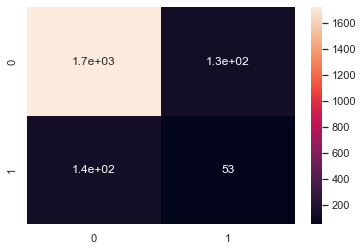

In [65]:
# walmart amazon clean character based
dist_train_char_4_1 = getDistanceChar(clean_train4['text_left'], clean_train4['text_right'])
real_train4_1 = toInt(clean_train4['label'])
t_train_char_4_1, f_train_char_4_1 = max_threshold(dist_train_char_4_1, real_train4_1)
print('walmart amazon clean character based method')
print('threshold of the training set is:{}'.format(t_train_char_4_1))
print('f1 score of training set is:{}'.format(f_train_char_4_1))
dist_test_char_4_1 = getDistanceChar(clean_test4['text_left'], clean_test4['text_right'])
real_test4_1 = toInt(clean_test4['label'])
pre_list_char_4_1 = prediction(dist_test_char_4_1, t_train_char_4_1)
pre_char_4_1 = toInt(pre_list_char_4_1)
f_test_char_4_1 = f1_score(real_test4_1, pre_char_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_char_4_1))
print(classification_report(real_test4_1, pre_char_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_char_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [66]:
C2= confusion_matrix(real_test4_1, pre_list_char_4_1, labels=[0, 1])
print(C2)

[[1722  134]
 [ 140   53]]


In [67]:
# walmart amazon clean character based false positive (down left)
print("walmart amazon clean character based false positive")
for i in range(len(dist_test_char_4_1)):
    if(dist_test_char_4_1[i]<t_train_char_4_1 and real_test4_1[i]==0):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean character based false positive
18
da-lite da-plex deluxe rear projection screen - 96 x 96 av format electronics - general da-lite 27557 6426.99
da-lite 27651 da-glas deluxe rear projection screen - 96 x 96 av format projection screens da-lite
--------------------------------------
25
da-lite da-plex standard rear projection screen - 60 x 80 video format electronics - general da-lite 27544 2931.99
da-lite da-glas thru-the-wall rear projection screen - 90 x 120 video format projection screens da-lite 23056 8729.48
--------------------------------------
37
da-lite da-glas unframed rear projection screen - 57 3 4 x 77 video format electronics - general da-lite 27604 1609.99
da-plex base rear projection screen - 57 3 4 x 77 video format projection screens da-lite 2608.99
--------------------------------------
53
scosche 1993-up select subaru power 4-speaker connector car stereos scosche su03b 9.88
scosche su03rb 1993-up select subaru power 4-speaker connector speaker co

1063
arizona cardinals pro grip mouse mice team pro mark msnf01 26.99
buffalo bills pro grip mouse mice team promark msnf04 24.99
--------------------------------------
1067
brother tn360 black toner cartridge printers brother tn360 45.54
brother tn330 black toner cartridge laser printer toner brother tn330 32.47
--------------------------------------
1079
audiosource bi8 8 in-wall construction bracket mount furniture audiosource bi8 25.88
audiosource bi5 5.25 in-wall construction bracket mount home audio theater sharp 32.0
--------------------------------------
1085
corsair xms2 4 gb 2 x 2 gb pc2-6400 800 mhz 240-pin ddr2 dual-channel memory kit - twin2x4096-6400c5 memory corsair twin2x4096-6400c5 74.82
corsair xms2 2gb 2 x 1gb pc2-6400 800mhz 240-pin ddr2 cl5 dual channel desktop memory kit - twin2x2048-6400 computer components corsair twin2x2048-6400 32.99
--------------------------------------
1105
coby dvd-224blk compact dvd player dvd players coby dvd-224blk 34.88
coby dvd209blk 

In [68]:
# walmart amazon clean character based false negative (top right)
print("walmart amazon clean character based false negative")
for i in range(len(dist_test_char_4_1)):
    if(dist_test_char_4_1[i]>=t_train_char_4_1 and real_test4_1[i]==1):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean character based false negative
7
balt wheasel easel adjustable melamine dry erase board white stationery & office machinery balt 33250 239.88
balt inc. wheasel easel adjustable melamine dry erase board 28 3 4 x 59 1 2 white laminating supplies mayline 134.45
--------------------------------------
9
hp q3675a image transfer kit printers hp q3675a 194.84
hewlett packard q3675a image transfer kit for hp color laserjet 4650 cleaning repair hp q3675a
--------------------------------------
13
iogear gbu421w6 bluetooth usb micro adapter networking iogear gbu421w6 14.84
iogear bluetooth usb 2.1 micro adapter with tri-language package black computers accessories iogear gbu421w6 15.17
--------------------------------------
22
griffin ipod touch 4g formfit case pink clear mp3 accessories arkon gb01959 17.13
griffin technology formfit for ipod touch 4g pink clear cases griffin technology gb01959 7.53
--------------------------------------
42
srs labs analog rca volume leveler 

night owl optics apollo-45 4-channel h. 264 500gb dvr kit garden - general night owl apollo-45 338.0
night owl security apollo-45 4-channel h. 264 dvr surveillance kit with d1 recording digital security recorders night owl optics apollo-45 294.48
--------------------------------------
1610
dane-elec 8gb high-speed compact flash memory card usb drives dane-elec dacf3008gc 44.88
dane-elec high speed 300x 8 gb usb 2.0 compact flash card udma da-cf30-08g-c blank media dane-elec da-cf30-08g-c 29.06
--------------------------------------
1626
kingston kth-mlg4 2g 2gb ddr2 240-pin sdram server memory module memory kingston kth-mlg4 / 2g 55.92
kingston memory - 2 gb 2 x 1 gb - dimm 240-pin - ddr ii kth-mlg4 2g memory kingston kth-mlg4 / 2g 52.68
--------------------------------------
1637
quartet total erase 3-month modular planning system aluminum frame 36 stationery & office machinery quartet cmp32 129.94
new-quartet cmp32 - total erase 3-month modular planning system 36 x 24 aluminum frame 

### crossparsing

amazon itunes clean character crossparsing
threshold of the training set is:0.28
f1 score of training set is:0.4316436251920123
f1 score of the testing set is:0.42990654205607476
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1856
           1       0.39      0.48      0.43       193

    accuracy                           0.88      2049
   macro avg       0.67      0.70      0.68      2049
weighted avg       0.89      0.88      0.89      2049

[[1713  143]
 [ 101   92]]


<AxesSubplot:>

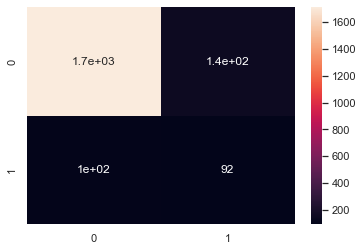

In [69]:
# walmart amazon clean crossparsing
dist_train_cross_4_1 = getDistanceCross(clean_train4['text_left'], clean_train4['text_right'])
real_train4_1 = toInt(clean_train4['label'])
t_train_cross_4_1, f_train_cross_4_1 = max_threshold(dist_train_cross_4_1, real_train4_1)
print('amazon itunes clean character crossparsing')
print('threshold of the training set is:{}'.format(t_train_cross_4_1))
print('f1 score of training set is:{}'.format(f_train_cross_4_1))
dist_test_cross_4_1 = getDistanceCross(clean_test4['text_left'], clean_test4['text_right'])
real_test4_1 = toInt(clean_test4['label'])
pre_list_cross_4_1 = prediction(dist_test_cross_4_1, t_train_cross_4_1)
pre_cross_4_1 = toInt(pre_list_cross_4_1)
f_test_cross_4_1 = f1_score(real_test4_1, pre_cross_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_cross_4_1))
print(classification_report(real_test4_1, pre_cross_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_cross_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [70]:
C2= confusion_matrix(real_test4_1, pre_list_cross_4_1, labels=[0, 1])
print(C2)

[[1713  143]
 [ 101   92]]


In [71]:
# walmart amazon clean crossparsing false positive
print("walmart amazon clean crossparsing false positive")
for i in range(len(dist_test_cross_4_1)):
    if(dist_test_cross_4_1[i]<t_train_cross_4_1 and real_test4_1[i]==0):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean crossparsing false positive
16
elite screens cinegray prime vision series fixed frame screen - 135 diagonal electronics - general elite screens pvr135h1 1069.0
cinegray ezframe series fixed frame screen - 150 diagonal projection screens elite 879.0
--------------------------------------
18
da-lite da-plex deluxe rear projection screen - 96 x 96 av format electronics - general da-lite 27557 6426.99
da-lite 27651 da-glas deluxe rear projection screen - 96 x 96 av format projection screens da-lite
--------------------------------------
21
samsung s2 640gb usb 3.0 portable external hard drive red hard drives samsung hx-mta64da / g42 78.88
samsung s2 portable hard drive 640 gb usb 3.0 external hard drive hx-mta64da g32 snow white external hard drives samsung hx-mta64da / g32 84.99
--------------------------------------
37
da-lite da-glas unframed rear projection screen - 57 3 4 x 77 video format electronics - general da-lite 27604 1609.99
da-plex base rear projection sc

wintec filemate 4gb swivel usb flash drive black usb drives wintec 3fmusb4gwb-r 7.84
wintec filemate 32 gb swivel usb drive - blue usb flash drives wintec 3fmusb32gwn-r 44.94
--------------------------------------
946
da-lite da-plex unframed rear projection screen - 84 x 84 av format electronics - general da-lite 27503 3561.99
da-lite 27512 da-plex unframed rear projection screen - 72 x 96 video format projection screens da-lite
--------------------------------------
953
gear head 2.4 ghz wireless optical nano mouse black mice gear head mp2800blk 15.82
gear head 2.4 ghz wireless optical nano mouse - red black usb mp2750red-cp10 mice gear head mp2750red-cp10 13.66
--------------------------------------
958
iosafe rugged 500gb usb 3.0 portable external hard drive hard drives iosafe pa50500u5yr 299.98
iosafe rugged portable 1 tb usb 3.0 external hard drive pa51000u1yr external hard drives iosafe pa51000u1yr 284.99
--------------------------------------
1052
vantec nexstar3 superspeed 2.5

1909
buffalo technology linkstation duo 1 tb 2 x 500 gb network attached storage ls-wx1 .0 tl r1 networking buffalo technology lswx10tlr1 192.63
buffalo technology linkstation live 1.0 tb shared network attached storage ls-ch1 .0 tl black network attached storage buffalo technology ls-ch1 .0 tl 99.97
--------------------------------------
1922
canon cli-226 black ink tank printers canon 4546b001 13.97
canon cli-226 gray ink tank 4550b001 inkjet printer ink canon 4550b001 13.97
--------------------------------------
1926
energizer er-p240 cordless phone battery computers energizer 11.88
energizer er-p290 2.4-volt cordless phone battery batteries energizer er-p290 7.32
--------------------------------------
1930
epson t020201 color ink cartridge printers epson t020201 27.0
epson t027201 inkjet cartridge color inkjet printer ink epson t027201 21.49
--------------------------------------
1961
da-lite da-glas deluxe rear projection screen - 50 x 50 av format electronics - general da-lite 27

In [72]:
# walmart amazon clean crossparsing false negative
print("walmart amazon clean crossparsing false negative")
for i in range(len(dist_test_cross_4_1)):
    if(dist_test_cross_4_1[i]>=t_train_cross_4_1 and real_test4_1[i]==1):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean crossparsing false negative
7
balt wheasel easel adjustable melamine dry erase board white stationery & office machinery balt 33250 239.88
balt inc. wheasel easel adjustable melamine dry erase board 28 3 4 x 59 1 2 white laminating supplies mayline 134.45
--------------------------------------
9
hp q3675a image transfer kit printers hp q3675a 194.84
hewlett packard q3675a image transfer kit for hp color laserjet 4650 cleaning repair hp q3675a
--------------------------------------
13
iogear gbu421w6 bluetooth usb micro adapter networking iogear gbu421w6 14.84
iogear bluetooth usb 2.1 micro adapter with tri-language package black computers accessories iogear gbu421w6 15.17
--------------------------------------
22
griffin ipod touch 4g formfit case pink clear mp3 accessories arkon gb01959 17.13
griffin technology formfit for ipod touch 4g pink clear cases griffin technology gb01959 7.53
--------------------------------------
91
optoma bl-fp230c replacement projector

pny 2gb sd memory card usb drives pny p-sd2gb-fs 6.98
pny optima 2gb sd class 4 flash memory card p-sd2gb-ef memory cards pny p-sd2gb-ef 3.97
--------------------------------------
814
canon ac adapter kit for powershot-sd900 sd800is sd700is photography - general canon ack-dc30 52.88
canon ack-dc30 ac adapter kit for sd700is sd800is sd850is sd870is sd880is sd890is sd900 sd950is sd990is sd970is sx200is digital cameras battery chargers canon 1137b001 49.99
--------------------------------------
816
allsop clingo universal hands free mount electronics - general allsop 30272 34.99
clingo universal hands-free car mount for iphone 4 3g 3gs and all cell phones and mobile devices mounts allsop 30272 20.07
--------------------------------------
837
zalman n series ssd0064n1 mlc 64gb internal sata ii solid state drive hard drives zalman usa inc ssd0064n1 144.0
zalman ssd-n series ssd0064n1 - solid state drive - 64 gb - 2.5 - sata-300 audio video accessories zalman ssd0064n1
---------------------

rolodex wood tone desk pad mahogany 24 x 19 stationery & office machinery rolodex 23390 37.94
rolodex 23390 - wood tone desk pad mahogany 24 x 19 blank media rolodex 34.65
--------------------------------------
1823
zyxel desktop gigabit switch gs-108b computers zyxel gs108b 34.99
zyxel gs108b 8 port gigabit ethernet switch with metal housing green energy saving technology kvm switches zyxel gs108b 33.68
--------------------------------------
1832
cobra mobile cb radio with nightwatch illuminated display and swr antenna calibration automotive - general cobra 29-wxnwst 150.0
cobra 29wxnwst nightwatch 40 channel cb radio cb radios cobra 29 wx nw st 132.28
--------------------------------------
1837
lexar 32gb twistturn jumpdrive usb drives lexar media ljdtt32gasbna 61.8
lexar ljdtt32gasbna jump drive twistturn 32 gb usb 2.0 flash drive gray computer accessories lexar ljdtt32gasbna 39.99
--------------------------------------
1864
antec tricool 92mm double ball bearing case fan electronic

### token based

walmart amazon clean overlap
threshold of the training set is:0.59
f1 score of training set is:0.39761092150170646
f1 score of the testing set is:0.42713567839195987
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1856
           1       0.41      0.44      0.43       193

    accuracy                           0.89      2049
   macro avg       0.68      0.69      0.68      2049
weighted avg       0.89      0.89      0.89      2049

[[1736  120]
 [ 108   85]]


<AxesSubplot:>

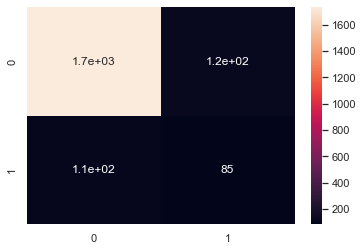

In [73]:
# walmart amazon clean overlap
coeff_train_overlap_4_1 = getCoeffOverlap(clean_train4['text_left'], clean_train4['text_right'])
real_train4_1 = toInt(clean_train4['label'])
t_train_overlap_4_1, f_train_overlap_4_1 = token_threshold(coeff_train_overlap_4_1, real_train4_1)
print('walmart amazon clean overlap')
print('threshold of the training set is:{}'.format(t_train_overlap_4_1))
print('f1 score of training set is:{}'.format(f_train_overlap_4_1))
coeff_test_overlap_4_1 = getCoeffOverlap(clean_test4['text_left'], clean_test4['text_right'])
real_test4_1 = toInt(clean_test4['label'])
pre_list_overlap_4_1 = token_prediction(coeff_test_overlap_4_1, t_train_overlap_4_1)
pre_overlap_4_1 = toInt(pre_list_overlap_4_1)
f_test_overlap_4_1 = f1_score(real_test4_1, pre_overlap_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_overlap_4_1))
print(classification_report(real_test4_1, pre_overlap_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_overlap_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [74]:
C2= confusion_matrix(real_test4_1, pre_list_overlap_4_1, labels=[0, 1])
print(C2)

[[1736  120]
 [ 108   85]]


In [75]:
# walmart amazon clean overlap false positive
print("walmart amazon clean overlap false positive")
for i in range(len(coeff_test_overlap_4_1)):
    if(coeff_test_overlap_4_1[i]>t_train_overlap_4_1 and real_test4_1[i]==0):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean overlap false positive
3
da-lite hc cinema vision tensioned advantage electrol - av format 8 x 8 diagonal electronics - general da-lite 89939 2595.0
hc da-mat tensioned advantage electrol - av format 50 x 50 projection screens da-lite
--------------------------------------
16
elite screens cinegray prime vision series fixed frame screen - 135 diagonal electronics - general elite screens pvr135h1 1069.0
cinegray ezframe series fixed frame screen - 150 diagonal projection screens elite 879.0
--------------------------------------
21
samsung s2 640gb usb 3.0 portable external hard drive red hard drives samsung hx-mta64da / g42 78.88
samsung s2 portable hard drive 640 gb usb 3.0 external hard drive hx-mta64da g32 snow white external hard drives samsung hx-mta64da / g32 84.99
--------------------------------------
27
tops second nature subject wire notebook college rule 6 x 9-1 2 we 80 sheets stationery & office machinery tops business forms 74109 5.54
tops 74111 - seco

1478
canon cli-226 black ink tank printers canon 0.0
canon pixma cli-8bk black ink tank printer ink toner canon 0620b002 8.6
--------------------------------------
1483
gear head 2.4 ghz wireless optical nano mouse black mice gear head mp2800blk 15.82
gear head 2.4 ghz wireless optical nano mouse - blue black usb mp2650blu-cp10 mice gear head mp2650blu-cp10 18.76
--------------------------------------
1490
innovera 7653 compatible ink 8000 page-yield red printers innovera 7653 54.1
innovera 7970 compatible ink 800 page-yield red inkjet printer ink innovera 19.7
--------------------------------------
1496
ifrogz ipod touch 4 luxe lean case pink mp3 accessories ifrogz it4ll-pnk 24.99
case ipod touch 4 soft gloss pink mp3 player accessories unknown
--------------------------------------
1508
platt heavy-duty polyethylene case with wheels and telescoping handle in gray 15 x 23 x 10 electronics - general platt 231510ahg 317.99
282011h platt heavy-duty polyethylene case with wheels and teles

In [76]:
# walmart amazon clean overlap false negative
print("walmart amazon clean overlap false negative")
for i in range(len(coeff_test_overlap_4_1)):
    if(coeff_test_overlap_4_1[i]<=t_train_overlap_4_1 and real_test4_1[i]==1):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean overlap false negative
7
balt wheasel easel adjustable melamine dry erase board white stationery & office machinery balt 33250 239.88
balt inc. wheasel easel adjustable melamine dry erase board 28 3 4 x 59 1 2 white laminating supplies mayline 134.45
--------------------------------------
9
hp q3675a image transfer kit printers hp q3675a 194.84
hewlett packard q3675a image transfer kit for hp color laserjet 4650 cleaning repair hp q3675a
--------------------------------------
13
iogear gbu421w6 bluetooth usb micro adapter networking iogear gbu421w6 14.84
iogear bluetooth usb 2.1 micro adapter with tri-language package black computers accessories iogear gbu421w6 15.17
--------------------------------------
91
optoma bl-fp230c replacement projector lamp for optoma ep749 projector monitors optoma bl-fp230c 294.84
electrified bl-fp230c sp .85 r01gc01 replacement lamp with housing for optoma projectors electrified bl-fp230c 134.44
--------------------------------------


bell o high-speed hdmi cable with ethernet 1-meter tv accessories bell ' o hd7101 59.99
bell o hd7101 high speed hdmi cables hdmi cables bell ' o hd7101 31.97
--------------------------------------
1212
sandisk 8gb microsdhc memory card usb drives sandisk sdsdq008ga11m 24.88
sandisk 8gb microsd card sdsdq 008g a11m blank media sandisk sdsdq-008g-a11m 5.59
--------------------------------------
1293
mach speed cartunes max range fm transmitter mp3 player mp3 mach speed cartunesmax 29.99
mach speed cartunes max fm transmitter universal fm cassette adapters mach speed mp3-cartunes max 21.99
--------------------------------------
1307
imation 11864 slr-5 data cartridge mp3 accessories imation 11864 55.92
imation slr5-8gb 5.25 data cartridge 84980236206 data cartridges imation 84980236206 57.26
--------------------------------------
1348
roocase executive portfolio leather case stylus for asus eee pad transformer tf101 10.1-inch electronics - general roocase 222057 55.99
roocase executive p

walmart amazon clean jaccard
threshold of the training set is:0.5
f1 score of training set is:0.4193792581377744
f1 score of the testing set is:0.42685851318944845
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1856
           1       0.40      0.46      0.43       193

    accuracy                           0.88      2049
   macro avg       0.67      0.69      0.68      2049
weighted avg       0.89      0.88      0.89      2049

[[1721  135]
 [ 104   89]]


<AxesSubplot:>

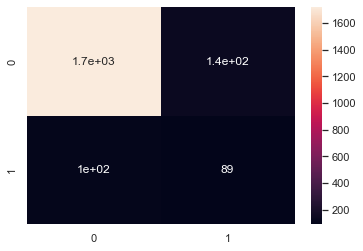

In [77]:
# walmart amazon clean jaccard
coeff_train_jaccard_4_1 = getCoeffJaccard(clean_train4['text_left'], clean_train4['text_right'])
real_train4_1 = toInt(clean_train4['label'])
t_train_jaccard_4_1, f_train_jaccard_4_1 = token_threshold(coeff_train_jaccard_4_1, real_train4_1)
print('walmart amazon clean jaccard')
print('threshold of the training set is:{}'.format(t_train_jaccard_4_1))
print('f1 score of training set is:{}'.format(f_train_jaccard_4_1))
coeff_test_jaccard_4_1 = getCoeffJaccard(clean_test4['text_left'], clean_test4['text_right'])
real_test4_1 = toInt(clean_test4['label'])
pre_list_jaccard_4_1 = token_prediction(coeff_test_jaccard_4_1, t_train_jaccard_4_1)
pre_jaccard_4_1 = toInt(pre_list_jaccard_4_1)
f_test_jaccard_4_1 = f1_score(real_test4_1, pre_jaccard_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_jaccard_4_1))
print(classification_report(real_test4_1, pre_jaccard_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_jaccard_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [78]:
C2= confusion_matrix(real_test4_1, pre_list_jaccard_4_1, labels=[0, 1])
print(C2)

[[1721  135]
 [ 104   89]]


In [79]:
# walmart amazon clean jaccard false positive
print("walmart amazon clean jaccard false positive")
for i in range(len(coeff_test_jaccard_4_1)):
    if(coeff_test_jaccard_4_1[i]>t_train_jaccard_4_1 and real_test4_1[i]==0):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean jaccard false positive
4
verbatim 4gb tuff - n - tiny usb 2.0 flash drive green usb drives verbatim 11.98
verbatim clip-it 4 gb usb 2.0 flash drive 97556 green usb flash drives verbatim 97556 10.98
--------------------------------------
16
elite screens cinegray prime vision series fixed frame screen - 135 diagonal electronics - general elite screens pvr135h1 1069.0
cinegray ezframe series fixed frame screen - 150 diagonal projection screens elite 879.0
--------------------------------------
18
da-lite da-plex deluxe rear projection screen - 96 x 96 av format electronics - general da-lite 27557 6426.99
da-lite 27651 da-glas deluxe rear projection screen - 96 x 96 av format projection screens da-lite
--------------------------------------
21
samsung s2 640gb usb 3.0 portable external hard drive red hard drives samsung hx-mta64da / g42 78.88
samsung s2 portable hard drive 640 gb usb 3.0 external hard drive hx-mta64da g32 snow white external hard drives samsung hx-mta

--------------------------------------
1314
guardian flexstep antifatigue polypropylene rubber mat 24 x 36 black home care guardian 24020300 36.97
guardian 24020302 - air step antifatigue mat polypropylene 24 x 36 black antitheft guardian
--------------------------------------
1330
da-lite da-glas deluxe rear projection screen - 40 1 4 x 53 3 4 video format electronics - general da-lite 27655 1752.99
da-lite 27660 da-glas deluxe rear projection screen - 72 x 96 video format projection screens da-lite
--------------------------------------
1371
hp 901 black inkjet cartridge twin pack printers hp hp cz075fn # 140 26.98
hp 940 black ink cartridge c4902an 140 inkjet printer ink hp c4902an # 140 17.34
--------------------------------------
1389
da-lite da-plex thru-the-wall rear projection screen - 78 x 139 hdtv format electronics - general da-lite 23077 11385.99
da-lite da-plex thru-the-wall rear projection screen - 90 x 120 video format projection screens da-lite 23055 12222.0
-----------

In [80]:
# walmart amazon clean jaccard false negative
print("walmart amazon clean jaccard false negative")
for i in range(len(coeff_test_jaccard_4_1)):
    if(coeff_test_jaccard_4_1[i]<=t_train_jaccard_4_1 and real_test4_1[i]==1):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean jaccard false negative
7
balt wheasel easel adjustable melamine dry erase board white stationery & office machinery balt 33250 239.88
balt inc. wheasel easel adjustable melamine dry erase board 28 3 4 x 59 1 2 white laminating supplies mayline 134.45
--------------------------------------
9
hp q3675a image transfer kit printers hp q3675a 194.84
hewlett packard q3675a image transfer kit for hp color laserjet 4650 cleaning repair hp q3675a
--------------------------------------
13
iogear gbu421w6 bluetooth usb micro adapter networking iogear gbu421w6 14.84
iogear bluetooth usb 2.1 micro adapter with tri-language package black computers accessories iogear gbu421w6 15.17
--------------------------------------
91
optoma bl-fp230c replacement projector lamp for optoma ep749 projector monitors optoma bl-fp230c 294.84
electrified bl-fp230c sp .85 r01gc01 replacement lamp with housing for optoma projectors electrified bl-fp230c 134.44
--------------------------------------


sabrent usb 2.0 firewire pcmcia cardbus networking sabrent sbt-pca4 14.88
sabrent sbt-pca4 4-port usb 2.0 firewire 1394 32-bit pcmcia cardbus combo adapter cables interconnects sabrent sbt-pca4 18.99
--------------------------------------
1795
sharp el1192bl printing calculator stationery & office machinery sharp el1192bl 37.63
sharp el1192bl two-color printing calculator calculator prting desktop pack of2 printing sharp 95.66
--------------------------------------
1823
zyxel desktop gigabit switch gs-108b computers zyxel gs108b 34.99
zyxel gs108b 8 port gigabit ethernet switch with metal housing green energy saving technology kvm switches zyxel gs108b 33.68
--------------------------------------
1829
samsung ht-d5300 3d wi-fi ready home theater system home theater samsung ht-d5300 298.0
samsung electronics ht-d5300 home theater system dvd home theater samsung htd5300
--------------------------------------
1832
cobra mobile cb radio with nightwatch illuminated display and swr antenna c

walmart amazon clean dice
threshold of the training set is:0.53
f1 score of training set is:0.3946037099494098
f1 score of the testing set is:0.41309823677581864
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1856
           1       0.40      0.42      0.41       193

    accuracy                           0.89      2049
   macro avg       0.67      0.68      0.68      2049
weighted avg       0.89      0.89      0.89      2049

[[1734  122]
 [ 111   82]]


<AxesSubplot:>

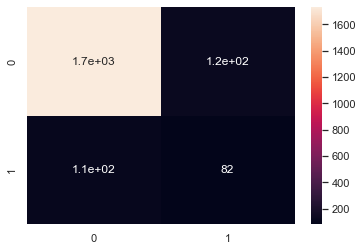

In [81]:
# walmart amazon clean dice
coeff_train_dice_4_1 = getCoeffDice(clean_train4['text_left'], clean_train4['text_right'])
real_train4_1 = toInt(clean_train4['label'])
t_train_dice_4_1, f_train_dice_4_1 = token_threshold(coeff_train_dice_4_1, real_train4_1)
print('walmart amazon clean dice')
print('threshold of the training set is:{}'.format(t_train_dice_4_1))
print('f1 score of training set is:{}'.format(f_train_dice_4_1))
coeff_test_dice_4_1 = getCoeffDice(clean_test4['text_left'], clean_test4['text_right'])
real_test4_1 = toInt(clean_test4['label'])
pre_list_dice_4_1 = token_prediction(coeff_test_dice_4_1, t_train_dice_4_1)
pre_dice_4_1 = toInt(pre_list_dice_4_1)
f_test_dice_4_1 = f1_score(real_test4_1, pre_dice_4_1, average='binary')
print('f1 score of the testing set is:{}'.format(f_test_dice_4_1))
print(classification_report(real_test4_1, pre_dice_4_1))
sns.set()
C2= confusion_matrix(real_test4_1, pre_list_dice_4_1, labels=[0, 1])
print(C2)
sns.heatmap(C2,annot=True)

In [82]:
C2= confusion_matrix(real_test4_1, pre_list_dice_4_1, labels=[0, 1])
print(C2)

[[1734  122]
 [ 111   82]]


In [83]:
# walmart amazon clean dice false positive
print("walmart amazon clean dice false positive")
for i in range(len(coeff_test_dice_4_1)):
    if(coeff_test_dice_4_1[i]>t_train_dice_4_1 and real_test4_1[i]==0):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean dice false positive
3
da-lite hc cinema vision tensioned advantage electrol - av format 8 x 8 diagonal electronics - general da-lite 89939 2595.0
hc da-mat tensioned advantage electrol - av format 50 x 50 projection screens da-lite
--------------------------------------
16
elite screens cinegray prime vision series fixed frame screen - 135 diagonal electronics - general elite screens pvr135h1 1069.0
cinegray ezframe series fixed frame screen - 150 diagonal projection screens elite 879.0
--------------------------------------
18
da-lite da-plex deluxe rear projection screen - 96 x 96 av format electronics - general da-lite 27557 6426.99
da-lite 27651 da-glas deluxe rear projection screen - 96 x 96 av format projection screens da-lite
--------------------------------------
21
samsung s2 640gb usb 3.0 portable external hard drive red hard drives samsung hx-mta64da / g42 78.88
samsung s2 portable hard drive 640 gb usb 3.0 external hard drive hx-mta64da g32 snow white e

balt flipper rectangular training table top teak furniture balt 89775 359.0
new-balt 89863 - flipper training table top rectangular 72w x 24d teak - blt89863 turntables balt
--------------------------------------
1389
da-lite da-plex thru-the-wall rear projection screen - 78 x 139 hdtv format electronics - general da-lite 23077 11385.99
da-lite da-plex thru-the-wall rear projection screen - 90 x 120 video format projection screens da-lite 23055 12222.0
--------------------------------------
1403
rca cassette adapter mp3 accessories rca ah760r 12.88
car cassette adapter audio video accessories rca ah600n 10.48
--------------------------------------
1433
da-lite da-plex self trimming rear projection screen - 58 x 104 hdtv format electronics - general da-lite 27590 4635.99
da-glas self trimming rear projection screen - 70 x 70 av format projection screens da-lite 3127.99
--------------------------------------
1446
da-lite da-plex self trimming rear projection screen - 96 x 120 av format e

In [84]:
# walmart amazon clean dice false negative
print("walmart amazon clean dice false negative")
for i in range(len(coeff_test_dice_4_1)):
    if(coeff_test_dice_4_1[i]<=t_train_dice_4_1 and real_test4_1[i]==1):
        s1 = clean_test4['text_left'].iloc[i]
        s2 = clean_test4['text_right'].iloc[i]
        print(i)
        print(s1)
        print(s2)
        print("--------------------------------------")

walmart amazon clean dice false negative
7
balt wheasel easel adjustable melamine dry erase board white stationery & office machinery balt 33250 239.88
balt inc. wheasel easel adjustable melamine dry erase board 28 3 4 x 59 1 2 white laminating supplies mayline 134.45
--------------------------------------
9
hp q3675a image transfer kit printers hp q3675a 194.84
hewlett packard q3675a image transfer kit for hp color laserjet 4650 cleaning repair hp q3675a
--------------------------------------
13
iogear gbu421w6 bluetooth usb micro adapter networking iogear gbu421w6 14.84
iogear bluetooth usb 2.1 micro adapter with tri-language package black computers accessories iogear gbu421w6 15.17
--------------------------------------
91
optoma bl-fp230c replacement projector lamp for optoma ep749 projector monitors optoma bl-fp230c 294.84
electrified bl-fp230c sp .85 r01gc01 replacement lamp with housing for optoma projectors electrified bl-fp230c 134.44
--------------------------------------
117

--------------------------------------
1426
officemate plastic coated paper clips assorted colors 800pk stationery & office machinery officemate 97228 8.88
officemate 97228 - plastic coated paper clips no. 2 size assorted colors 800 pack printers officemate
--------------------------------------
1447
paper mate mechanical pencil starter set stationery & office machinery paper mate 1739312 4.87
paper mate 1739312 - megalead mechanical pencil starter set 0.7 mm 2 erasure refills blue barrel printer accessories paper mate 23.96
--------------------------------------
1465
imation 26607 rdx cartridge hard drive hard drives imation 26607 117.84
160gb cartridge for rdx govt series taa imation 26718 156.83
--------------------------------------
1494
fellowes goriser laptop elevator electronics - general fellowes 8030401 21.88
fellowes 8030401 laptop goriser laptop netbook computer accessories fellowes 8030401 14.95
--------------------------------------
1503
sabrent 5-port usb 2.0 pci card ada